# Final Project : Stock Price Analysis And Prediction


### Submitted by :

Aishwarya Deshmane

Nabid Zaman

Sweety Saha

### Abstract

A correct prediction of stocks can lead to huge profits for the seller and the broker .Frequently , it is brought that prediction is chaotic rather than random, which means it can be predicted by carefully analyzing the history of respective stock market. For publicly traded corporations, the stock market is where shares are bought and sold. The stock exchange acts as a middleman to facilitate the buying and selling of shares. Shares market forecasting aids in estimating the future value of business stock and other financial instruments traded on a market.

We predict our stock market prediction utilizing supervised machine learning. In this case, we employed a logistics model and linear regression.

__Major Outcomes__

▪Helps companies to raise capital

▪Helps create personal wealth

▪Serves as an indicator of the state of the economy 

▪Helps to increase investment

## Introduction

Shares of publicly traded corporations can be purchased and sold on the stock market

Over the long term, stocks have the highest potential for growth (capital appreciation) for investors and a successful stock forecast can lead to huge gains

Existing problems:

* Unaware of how their portfolio is working

* Invest without knowing risk and forecasting

* Finding the right stocks with good returns

__Goal__ is to predict the risk and forecast the trend accurately.

Used __NASDAQ__ data (Nasdaq Data Link APIs provide a flexible and efficient method of delivery for real-time exchange data and other financial information https://data.nasdaq.com). Due to limitaion of data we imported another set of data from Yahoo. __Yahoo__(The Yahoo Finance API is a range of libraries/APIs/methods to obtain historical and real time data for a variety of financial markets and products, as shown on Yahoo Finance- https://finance.yahoo.com/.) to get the data.

And also we used CSV file to find top stocks. (We fetched stock name and tickers from Investment website and market capitalization related information from investopedia (https://www.investopedia.com) . Later we used some excel formulas to create desirable data then we convert our data into CSV file.)

Employed supervised machine learning, logistics model and linear regression model

###  Research Questions


1.	__What are the most popular/ trending stocks?__
    
  -We have considered top performing stocks in S&P 500 for analyzing the best investment options for the investors.
  

2.	__Compare Daily,Monthly and Yearly Returns of the trending stocks.__
    
  -We calculated and compared Daily,Monthly and Yearly Returns of top 5 stocks
  
    
3.	__How much risk is involved in each stock returns.__
    
  -Calculate risk and expected returns of stocks
  

4.	__Compare 52 week’s highest & lowest closing prices__
    
  -52 week's highest & Lowest closing price are one of the key indicator for evaluating stocks also calculate the mean.  
  

5.	__Show statistical analysis of the best performing stock.__
    
  -We have performed statistical analysis(RSI,ALPHA,BETA,RETURNS,PROFIT AND LOSS) for trending stocks.
  

6.	__Forecast stock value for future year.__
    
  -Based on the historical price and historical financials, we have trained a model which provided forcast for future value of the stock.
  

7.	__Suggest the best stock to invest__

  -After completed of successful analysis, we have provided sort listed stocks for as investment suggestion. 





##  Research Approach

As discussed earlier, we have imported our data from Nasdaq data link and Yahoo also we created a csv file with the information of tickers and their rankings.

We ranked the tickers based on market capitalization and its weight in the index. Whereas for this project we used the ranking per market capitalization.

Further we scraped data from web API and performed few operations like- Feature engineering, data reshaping etc.
We performed EDA which covers -nullvalues,Mean,corr between variables, standard deviation,52 week high-low values,Moving averages etc.

### Data Preparation 
We have dropped unused columns and data reshaping. Added few columns like calculated profit, return, pct_change, HL_pct etc. where ever required.
For Predictive models- we have scaled all available "Close" value. We used the default configuration and scaled values to the range 0 and 1. First, a MinMaxScaler instance is defined with default hyperparameters. 

We did statistical Analysis on the data to calcutate Risk, RSI, return, comparision between the stocks.
Using this statistics we have trained the model to predict the future price also we included ML.
To conclude, the prediction model matches the actual trend.

 



We have installed few new libraries below:

* nasdaq data link
* talib
* cufflinks
* datareader
* tensorflow
* keras

In [1]:
import nasdaqdatalink as nsd
import requests
import numpy as np
import pandas as pd
import quandl
import talib

from pandas import Series,DataFrame

# For Visualization
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import cufflinks as cf
cf.go_offline()

import datetime
import pandas_datareader.data as web
from pandas_datareader import data
from pandas.plotting import scatter_matrix

from pandas_datareader import data
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import datetime as dt

In [3]:
Tpath = "https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-5400/main/Top_25_Stocks_data.csv"
Tickers = pd.read_csv(Tpath)
Tickers.head()

,Name,Ticker,Index constituents by weight,Sector,Rank per weight,Market Capitalization,Market capital,Rank per Market capital
0,Apple,AAPL,6.99%,Information Technology,1,2.261T,2.261000e+12,1
1,Microsoft,MSFT,5.63%,Information Technology,2,1.829T,1.829000e+12,2
2,Alphabet Class A,GOOGL,1.93%,Communication Services,5,1.203T,1.203000e+12,3
3,Alphabet Class C,GOOG,1.71%,Communication Services,6,1.203T,1.203000e+12,4
4,Amazon,AMZN,3.32%,Consumer Discretionary,3,908.865B,9.088650e+11,5


In [4]:
#Take the top 5 tickers using the Rank per Market capital
ticker5 = Tickers['Ticker'][Tickers['Rank per Market capital']<=5]

In [5]:
#Request the data using any ticker to check how the data looks
p = requests.get('https://data.nasdaq.com/api/v3/datasets/WIKI/AAPL/data.json?start_date=2016-01-01&end_date=2017-12-31&api_key=rb-DPrFFZgrryoJQzyzQ').json()

In [6]:
type(p)

dict

In [7]:
p.items()

dict_items([('dataset_data', {'limit': None, 'transform': None, 'column_index': None, 'column_names': ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'], 'start_date': '2016-01-01', 'end_date': '2017-12-31', 'frequency': 'daily', 'data': [['2017-12-29', 170.52, 170.59, 169.22, 169.23, 25643711.0, 0.0, 1.0, 170.52, 170.59, 169.22, 169.23, 25643711.0], ['2017-12-28', 171.0, 171.85, 170.48, 171.08, 15997739.0, 0.0, 1.0, 171.0, 171.85, 170.48, 171.08, 15997739.0], ['2017-12-27', 170.1, 170.78, 169.71, 170.6, 21672062.0, 0.0, 1.0, 170.1, 170.78, 169.71, 170.6, 21672062.0], ['2017-12-26', 170.8, 171.47, 169.679, 170.57, 32968167.0, 0.0, 1.0, 170.8, 171.47, 169.679, 170.57, 32968167.0], ['2017-12-22', 174.68, 175.424, 174.5, 175.01, 16052615.0, 0.0, 1.0, 174.68, 175.424, 174.5, 175.01, 16052615.0], ['2017-12-21', 174.17, 176.02, 174.1, 175.01, 20356826.0, 0.0, 1.0, 174.17, 176.02, 174.1, 175.01, 2

In [8]:
#Create dataframe for the top 10 tickers using for loop
#ranging between dates 2016-01-01 and 2017-12-31
#Add the ticker column to the dataframe

stock_data = pd.DataFrame()

for t in ticker5:
    path1 = 'https://data.nasdaq.com/api/v3/datasets/WIKI/'+t+'/data.json?start_date=2016-01-01&end_date=2017-12-31&api_key=rb-DPrFFZgrryoJQzyzQ'
    sdata = requests.get(path1).json()
    sdata_df = pd.DataFrame(sdata['dataset_data']['data'])
    sdata_df['ticker'] = t
    stock_data = stock_data.append(sdata_df)


/var/folders/c5/0_ry9lhx0tqg3rsbqsysn5cr0000gn/T/ipykernel_84981/549470072.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/c5/0_ry9lhx0tqg3rsbqsysn5cr0000gn/T/ipykernel_84981/549470072.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/c5/0_ry9lhx0tqg3rsbqsysn5cr0000gn/T/ipykernel_84981/549470072.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/c5/0_ry9lhx0tqg3rsbqsysn5cr0000gn/T/ipykernel_84981/549470072.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/c5/0_ry9lhx0tqg3rsbqsysn5cr0000gn/T/ipykernel_84981/549470072.py:12: FutureWarning:

The frame.append method is depreca

In [9]:
stock_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,ticker
0,2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0,AAPL
1,2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0,AAPL
2,2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0,AAPL
3,2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0,AAPL
4,2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2016-01-08,619.66,624.140,606.000,607.05,5512915.0,0.0,1.0,619.66,624.140,606.000,607.05,5512915.0,AMZN
497,2016-01-07,621.80,630.000,605.210,607.94,7074915.0,0.0,1.0,621.80,630.000,605.210,607.94,7074915.0,AMZN
498,2016-01-06,622.00,639.790,620.310,632.65,5329197.0,0.0,1.0,622.00,639.790,620.310,632.65,5329197.0,AMZN
499,2016-01-05,646.86,646.910,627.650,633.79,5822603.0,0.0,1.0,646.86,646.910,627.650,633.79,5822603.0,AMZN


In [10]:
column_name = sdata['dataset_data']['column_names']

In [11]:
#Rename the columns
for i in range(len(column_name)):
    stock_data = stock_data.rename(columns={i:column_name[i]})

In [12]:
stock_data

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ticker
0,2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0,AAPL
1,2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0,AAPL
2,2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0,AAPL
3,2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0,AAPL
4,2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2016-01-08,619.66,624.140,606.000,607.05,5512915.0,0.0,1.0,619.66,624.140,606.000,607.05,5512915.0,AMZN
497,2016-01-07,621.80,630.000,605.210,607.94,7074915.0,0.0,1.0,621.80,630.000,605.210,607.94,7074915.0,AMZN
498,2016-01-06,622.00,639.790,620.310,632.65,5329197.0,0.0,1.0,622.00,639.790,620.310,632.65,5329197.0,AMZN
499,2016-01-05,646.86,646.910,627.650,633.79,5822603.0,0.0,1.0,646.86,646.910,627.650,633.79,5822603.0,AMZN


In [13]:
#Reset the index
stock_data = stock_data.reset_index(drop=True)
stock_data

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ticker
0,2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0,AAPL
1,2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0,AAPL
2,2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0,AAPL
3,2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0,AAPL
4,2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,2016-01-08,619.66,624.140,606.000,607.05,5512915.0,0.0,1.0,619.66,624.140,606.000,607.05,5512915.0,AMZN
2504,2016-01-07,621.80,630.000,605.210,607.94,7074915.0,0.0,1.0,621.80,630.000,605.210,607.94,7074915.0,AMZN
2505,2016-01-06,622.00,639.790,620.310,632.65,5329197.0,0.0,1.0,622.00,639.790,620.310,632.65,5329197.0,AMZN
2506,2016-01-05,646.86,646.910,627.650,633.79,5822603.0,0.0,1.0,646.86,646.910,627.650,633.79,5822603.0,AMZN


*Note: The values scraped with web API from NASDAQdatalink has the prices before any stock split, and the values scraped using Yahoo has the adjusted prices after stock split.

In [14]:
#Use describe function to get the overview of the data
stock_data.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,2508.00000,2508.000000,2508.000000,2508.000000,2.508000e+03,2508.000000,2508.0,2508.000000,2508.000000,2508.000000,2508.000000,2.508000e+03
mean,541.34783,545.144853,537.125679,541.357990,1.326368e+07,0.002839,1.0,540.799751,544.592317,536.581894,540.809513,1.326368e+07
std,378.56837,381.038223,375.732156,378.527636,1.631811e+07,0.037456,0.0,379.228260,381.703676,376.386609,379.187972,1.631811e+07
min,48.68000,49.146600,48.035000,48.430000,5.369580e+05,0.000000,1.0,46.354018,47.201493,45.887431,46.771913,5.369580e+05
25%,105.41500,106.235000,104.732500,105.702500,1.644005e+06,0.000000,1.0,102.443550,103.607851,101.935843,102.882909,1.644005e+06
50%,723.01500,728.660000,716.545000,722.970000,3.538966e+06,0.000000,1.0,723.015000,728.660000,716.545000,722.970000,3.538966e+06
75%,839.71000,843.722500,834.307500,839.897500,2.301505e+07,0.000000,1.0,839.710000,843.722500,834.307500,839.897500,2.301505e+07
max,1204.88000,1213.410000,1191.150000,1195.830000,1.335030e+08,0.630000,1.0,1204.880000,1213.410000,1191.150000,1195.830000,1.335030e+08


In [15]:
#Drop the unwanted columns and prepare the data using feature engineering methods
stock_data = stock_data.drop(columns=['Ex-Dividend','Split Ratio','Adj. Open','Adj. High','Adj. Low','Adj. Volume'])
stock_data

,Date,Open,High,Low,Close,Volume,Adj. Close,ticker
0,2017-12-29,170.52,170.590,169.220,169.23,25643711.0,169.23,AAPL
1,2017-12-28,171.00,171.850,170.480,171.08,15997739.0,171.08,AAPL
2,2017-12-27,170.10,170.780,169.710,170.60,21672062.0,170.60,AAPL
3,2017-12-26,170.80,171.470,169.679,170.57,32968167.0,170.57,AAPL
4,2017-12-22,174.68,175.424,174.500,175.01,16052615.0,175.01,AAPL
...,...,...,...,...,...,...,...,...
2503,2016-01-08,619.66,624.140,606.000,607.05,5512915.0,607.05,AMZN
2504,2016-01-07,621.80,630.000,605.210,607.94,7074915.0,607.94,AMZN
2505,2016-01-06,622.00,639.790,620.310,632.65,5329197.0,632.65,AMZN
2506,2016-01-05,646.86,646.910,627.650,633.79,5822603.0,633.79,AMZN


### Exploratory data analysis:

In [16]:
#Check if the data contains any null values using isnull function
stock_data.isnull().any()

Date          False
Open          False
High          False
Low           False
Close         False
Volume        False
Adj. Close    False
ticker        False
dtype: bool

<AxesSubplot:>

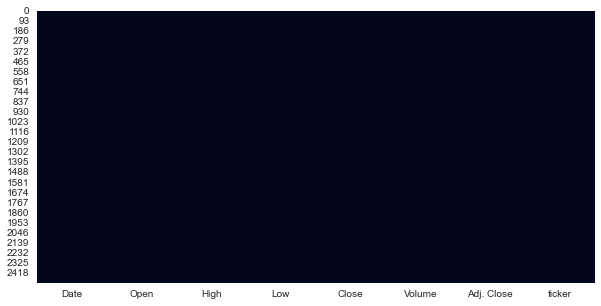

In [17]:
#Plot the heatmap to confirm no null values
plt.figure(figsize=(10,5))
sns.heatmap(stock_data.isnull(),cbar=False)

<AxesSubplot:>

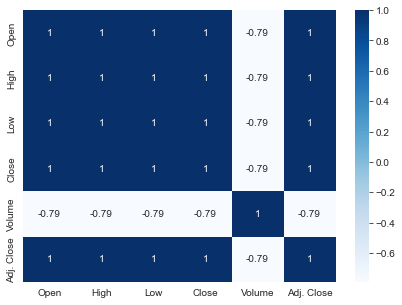

In [18]:
#Plot the heatmap of the correlation of the stock data to check the correlation
plt.figure(figsize=(7,5))
sns.heatmap(stock_data.corr(),cmap='Blues',annot=True)

The number showing 1 with dark blue color shows high positive correlation and are interrelated to each other. Whereas for Volume it is showing negative correlation with others

In [19]:
#Copy the dataframe to different df and create new columns to check the small differences in price values
stock_data1 = stock_data.copy()

In [20]:
stock_data1['open-high'] = stock_data1['Open'] - stock_data1['High']
stock_data1['open-low'] = stock_data1['Open'] - stock_data1['Low']
stock_data1['close-high'] = stock_data1['Close'] - stock_data1['High']
stock_data1['close-high'] = stock_data1['Close'] - stock_data1['Low']
stock_data1['high-low'] = stock_data1['High'] - stock_data1['Low']
stock_data1['open-close'] = stock_data1['Open'] - stock_data1['Close']
stock_data1

,Date,Open,High,Low,Close,Volume,Adj. Close,ticker,open-high,open-low,close-high,high-low,open-close
0,2017-12-29,170.52,170.590,169.220,169.23,25643711.0,169.23,AAPL,-0.070,1.300,0.010,1.370,1.29
1,2017-12-28,171.00,171.850,170.480,171.08,15997739.0,171.08,AAPL,-0.850,0.520,0.600,1.370,-0.08
2,2017-12-27,170.10,170.780,169.710,170.60,21672062.0,170.60,AAPL,-0.680,0.390,0.890,1.070,-0.50
3,2017-12-26,170.80,171.470,169.679,170.57,32968167.0,170.57,AAPL,-0.670,1.121,0.891,1.791,0.23
4,2017-12-22,174.68,175.424,174.500,175.01,16052615.0,175.01,AAPL,-0.744,0.180,0.510,0.924,-0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,2016-01-08,619.66,624.140,606.000,607.05,5512915.0,607.05,AMZN,-4.480,13.660,1.050,18.140,12.61
2504,2016-01-07,621.80,630.000,605.210,607.94,7074915.0,607.94,AMZN,-8.200,16.590,2.730,24.790,13.86
2505,2016-01-06,622.00,639.790,620.310,632.65,5329197.0,632.65,AMZN,-17.790,1.690,12.340,19.480,-10.65
2506,2016-01-05,646.86,646.910,627.650,633.79,5822603.0,633.79,AMZN,-0.050,19.210,6.140,19.260,13.07


<AxesSubplot:>

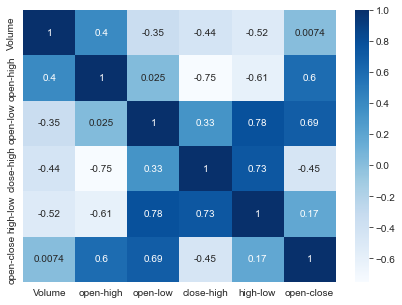

In [21]:
#Drop the unwanted columns and create the heat map and show the heatmap
stock_data1 = stock_data1.drop(['Open','High','Low','Close', 'Adj. Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(stock_data1.corr(),cmap='Blues',annot=True)

Let's focus on the volumes in the heatmap.The variables having high positive correlation value with the volume represents that the numbers might have intrigued with large numbers of buyers and sellers. Correlation between that variable and the volume variable will tell us how a change in that variable impacts the number of stocks traded that day.

Negative correlation of the open-low, close-high and high-low with the volume variable shows that greater the difference, greater the number of the stocks traded that day

In [22]:
#Add the Daily lag column to calculate the daily return
stock_data2 = stock_data.copy()
stock_data2['Daily Lag'] = stock_data2['Close'].shift(1)
stock_data2['Daily returns'] = (stock_data2['Daily Lag']/stock_data2['Close']) -1
stock_data2

,Date,Open,High,Low,Close,Volume,Adj. Close,ticker,Daily Lag,Daily returns
0,2017-12-29,170.52,170.590,169.220,169.23,25643711.0,169.23,AAPL,NaN,NaN
1,2017-12-28,171.00,171.850,170.480,171.08,15997739.0,171.08,AAPL,169.23,-0.010814
2,2017-12-27,170.10,170.780,169.710,170.60,21672062.0,170.60,AAPL,171.08,0.002814
3,2017-12-26,170.80,171.470,169.679,170.57,32968167.0,170.57,AAPL,170.60,0.000176
4,2017-12-22,174.68,175.424,174.500,175.01,16052615.0,175.01,AAPL,170.57,-0.025370
...,...,...,...,...,...,...,...,...,...,...
2503,2016-01-08,619.66,624.140,606.000,607.05,5512915.0,607.05,AMZN,617.74,0.017610
2504,2016-01-07,621.80,630.000,605.210,607.94,7074915.0,607.94,AMZN,607.05,-0.001464
2505,2016-01-06,622.00,639.790,620.310,632.65,5329197.0,632.65,AMZN,607.94,-0.039058
2506,2016-01-05,646.86,646.910,627.650,633.79,5822603.0,633.79,AMZN,632.65,-0.001799


<AxesSubplot:>

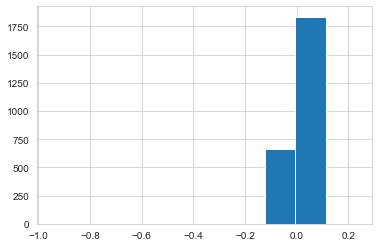

In [23]:
#plot the daily return histogram for 2 years
stock_data2['Daily returns'].hist()

The return of the whole portfolio ranges from -0.1 to 0.1% on daily basis

In [24]:
ticker_wise = stock_data.copy()

In [25]:
#Set Date and tikcers as the index
ticker_wise = ticker_wise.set_index(['Date','ticker'])

In [26]:
#set column index named Tvalues
columns = pd.Index(['Open', 'High', 'Low','Close','Volume','Adj. Close'], name='Tvalues')
ticker_wise = ticker_wise.reindex(columns=columns)

In [27]:
#Reshape the table using stack and unstack function
ticker_wise = ticker_wise.stack().unstack('ticker').unstack('Tvalues')

In [28]:
ticker_wise

ticker        AAPL                                                       AMZN  \
Tvalues       Open     High      Low   Close      Volume  Adj. Close     Open   
Date                                                                            
2016-01-04  102.61  105.368  102.000  105.35  67649387.0  101.783763   656.29   
2016-01-05  105.75  105.850  102.410  102.71  55790992.0   99.233131   646.86   
2016-01-06  100.56  102.370   99.870  100.70  68457388.0   97.291172   622.00   
2016-01-07   98.68  100.130   96.430   96.45  81094428.0   93.185040   621.80   
2016-01-08   98.55   99.110   96.760   96.96  70798016.0   93.677776   619.66   
...            ...      ...      ...     ...         ...         ...      ...   
2017-12-22  174.68  175.424  174.500  175.01  16052615.0  175.010000  1172.08   
2017-12-26  170.80  171.470  169.679  170.57  32968167.0  170.570000  1168.36   
2017-12-27  170.10  170.780  169.710  170.60  21672062.0  170.600000  1179.91   
2017-12-28  171.00  171.850  170.480  171.08  15997739.0  171.080000  1189.00   
2017-12-29  170.52  170.590  169.220  169.23  25643711.0  169.230000  1182.35   

ticker                                  ...      GOOGL                      \
Tvalues         High      Low    Close  ...        Low    Close     Volume   
Date                                    ...                                  
2016-01-04   657.715   627.51   636.99  ...   747.5400   759.44  3369068.0   
2016-01-05   646.910   627.65   633.79  ...   755.6500   761.53  2260795.0   
2016-01-06   639.790   620.31   632.65  ...   748.0000   759.33  2410301.0   
2016-01-07   630.000   605.21   607.94  ...   735.2800   741.00  3156563.0   
2016-01-08   624.140   606.00   607.05  ...   728.9201   730.91  2375348.0   
...              ...      ...      ...  ...        ...      ...        ...   
2017-12-22  1174.620  1167.83  1168.36  ...  1067.6400  1068.86   860800.0   
2017-12-26  1178.320  1160.55  1176.76  ...  1058.6400  1065.85   914574.0   
2017-12-27  1187.290  1175.61  1182.26  ...  1058.3800  1060.20  1027634.0   
2017-12-28  1190.100  1184.38  1186.10  ...  1053.3800  1055.95   982285.0   
2017-12-29  1184.000  1167.50  1169.47  ...  1052.7000  1053.40  1156357.0   

ticker                  MSFT                                                 
Tvalues    Adj. Close   Open     High     Low  Close      Volume Adj. Close  
Date                                                                         
2016-01-04     759.44  54.32  54.8000  53.390  54.80  53777963.0  52.181598  
2016-01-05     761.53  54.93  55.3900  54.540  55.05  34079674.0  52.419653  
2016-01-06     759.33  54.32  54.4001  53.640  54.05  39518863.0  51.467434  
2016-01-07     741.00  52.70  53.4850  52.070  52.17  56564852.0  49.677262  
2016-01-08     730.91  52.37  53.2800  52.150  52.33  48753969.0  49.829617  
...               ...    ...      ...     ...    ...         ...        ...  
2017-12-22    1068.86  85.40  85.6300  84.920  85.51  14033977.0  85.510000  
2017-12-26    1065.85  85.31  85.5346  85.030  85.40   9737412.0  85.400000  
2017-12-27    1060.20  85.65  85.9800  85.215  85.71  13000828.0  85.710000  
2017-12-28    1055.95  85.90  85.9300  85.550  85.72   9872795.0  85.720000  
2017-12-29    1053.40  85.63  86.0500  85.500  85.54  18162779.0  85.540000  

[502 rows x 30 columns]

In [29]:
ticker_wise.columns

MultiIndex([( 'AAPL',       'Open'),
            ( 'AAPL',       'High'),
            ( 'AAPL',        'Low'),
            ( 'AAPL',      'Close'),
            ( 'AAPL',     'Volume'),
            ( 'AAPL', 'Adj. Close'),
            ( 'AMZN',       'Open'),
            ( 'AMZN',       'High'),
            ( 'AMZN',        'Low'),
            ( 'AMZN',      'Close'),
            ( 'AMZN',     'Volume'),
            ( 'AMZN', 'Adj. Close'),
            ( 'GOOG',       'Open'),
            ( 'GOOG',       'High'),
            ( 'GOOG',        'Low'),
            ( 'GOOG',      'Close'),
            ( 'GOOG',     'Volume'),
            ( 'GOOG', 'Adj. Close'),
            ('GOOGL',       'Open'),
            ('GOOGL',       'High'),
            ('GOOGL',        'Low'),
            ('GOOGL',      'Close'),
            ('GOOGL',     'Volume'),
            ('GOOGL', 'Adj. Close'),
            ( 'MSFT',       'Open'),
            ( 'MSFT',       'High'),
            ( 'MSFT',        'Low'),
 

Plot the all tickers in one graph to see the trend

Also plot the famous candlestick charts(usually used in stock market) for all the tickers separately. One can zoom-in the chart by selecting the candles and see closely

<AxesSubplot:xlabel='Date'>

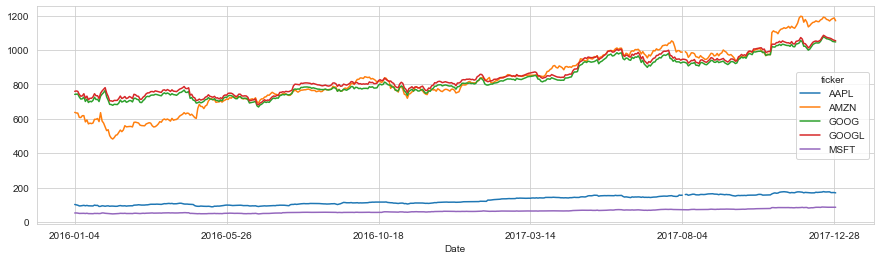

In [30]:
#plot the graphs for all the tickers
ticker_wise.xs(key='Adj. Close',axis=1,level='Tvalues').plot(figsize=(15,4))

In [31]:
#plot candlestick chart for every ticker
for t in ticker5:
    ticker_wise[t][['Open', 'High', 'Low', 'Close']].loc['2016-01-01':'2017-12-31'].iplot(kind='candle')

Check how the high, low and mean values looks like

In [32]:
#2016- 52 week high
print("52-week high for 2016:\n",ticker_wise.loc['2016-01-01':'2016-12-31'].xs(key='Adj. Close',axis = 1, level = 'Tvalues').max().round(2))

#2017- 52 week high
print("\n52-week high for 2017:\n",ticker_wise.loc['2017-01-01':'2017-12-31'].xs(key='Adj. Close',axis = 1, level = 'Tvalues').max().round(2))

52-week high for 2016:
 ticker
AAPL     116.19
AMZN     844.36
GOOG     813.11
GOOGL    835.74
MSFT      62.24
dtype: float64

52-week high for 2017:
 ticker
AAPL      176.42
AMZN     1195.83
GOOG     1077.14
GOOGL    1085.09
MSFT       86.85
dtype: float64


In [33]:
#2016- 52 week low
print("52-week low for 2016:\n",ticker_wise.loc['2016-01-01':'2016-12-31'].xs(key='Adj. Close',axis = 1, level = 'Tvalues').min().round(2))

#2017- 52 week low
print("\n52-week low for 2017:\n",ticker_wise.loc['2017-01-01':'2017-12-31'].xs(key='Adj. Close',axis = 1, level = 'Tvalues').min().round(2))

52-week low for 2016:
 ticker
AAPL      88.29
AMZN     482.07
GOOG     668.26
GOOGL    681.14
MSFT      46.77
dtype: float64

52-week low for 2017:
 ticker
AAPL     114.59
AMZN     753.67
GOOG     786.14
GOOGL    807.77
MSFT      60.95
dtype: float64


In [34]:
#2016- mean
print("mean for 2016:\n",ticker_wise.loc['2016-01-01':'2016-12-31'].xs(key='Adj. Close',axis = 1, level = 'Tvalues').mean().round(2))

#2017- mean
print("\nmean for 2017:\n",ticker_wise.loc['2017-01-01':'2017-12-31'].xs(key='Adj. Close',axis = 1, level = 'Tvalues').mean().round(2))

mean for 2016:
 ticker
AAPL     102.31
AMZN     699.52
GOOG     743.49
GOOGL    763.21
MSFT      53.38
dtype: float64

mean for 2017:
 ticker
AAPL     149.82
AMZN     967.40
GOOG     921.31
GOOGL    939.30
MSFT      71.23
dtype: float64


In [35]:
print("Date for minimum Adj closing price overall for ")
for t in ticker5:
    print(t,":",ticker_wise[t]['Adj. Close'].idxmin())

#https://www.cnbc.com/2016/06/27/us-markets.html

Date for minimum Adj closing price overall for 
AAPL : 2016-05-12
MSFT : 2016-06-27
GOOGL : 2016-06-27
GOOG : 2016-06-27
AMZN : 2016-02-09


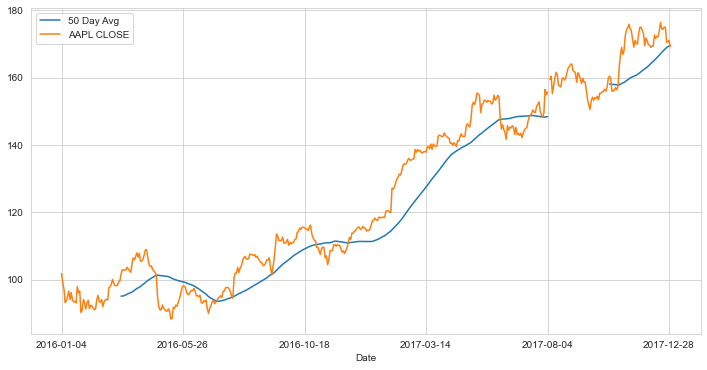

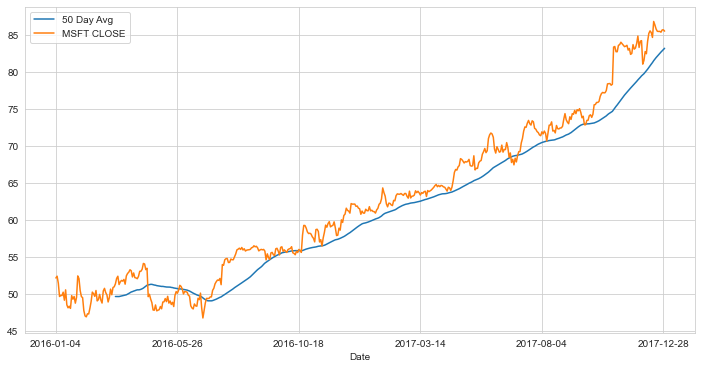

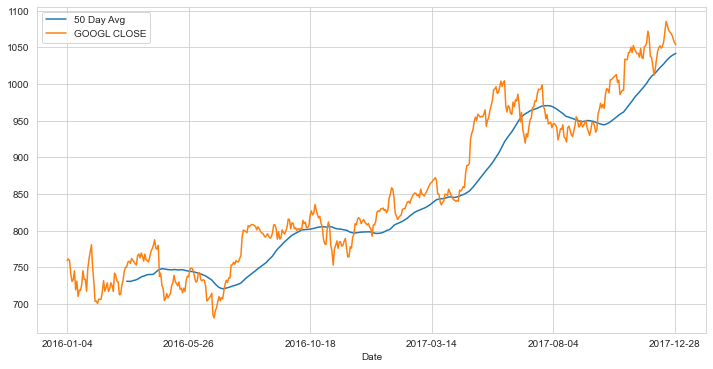

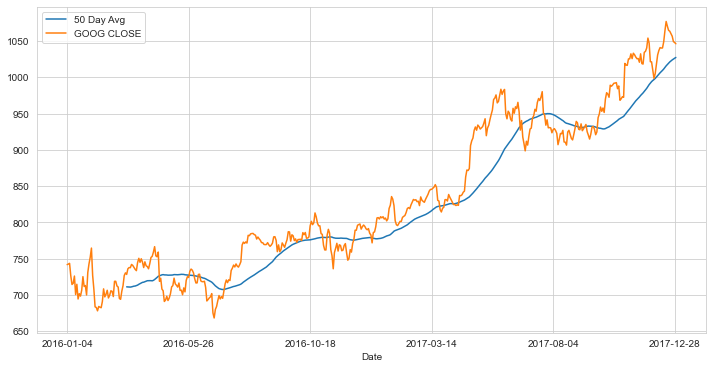

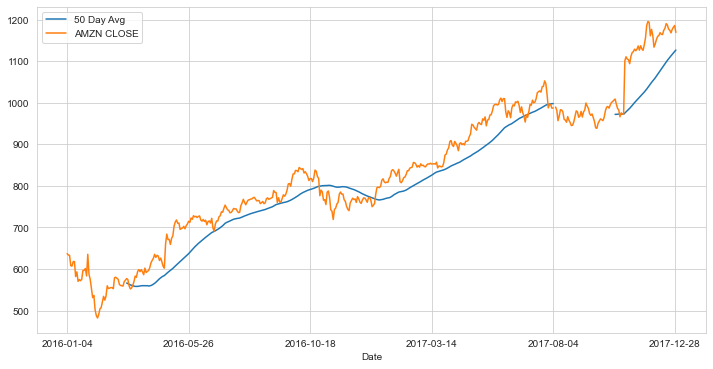

In [36]:
#plot actual prices with the moving average
for t in ticker5:
    plt.figure(figsize=(12,6))
    ticker_wise[t]['Adj. Close'].loc['2016-01-01':'2017-12-31'].rolling(window=50).mean().plot(label='50 Day Avg')
    ticker_wise[t]['Adj. Close'].loc['2016-01-01':'2017-12-31'].plot(label= t+' CLOSE')
    plt.legend()


ticker
AMZN     17.72
MSFT     16.49
AAPL     12.38
GOOGL     4.35
GOOG      4.04
dtype: float64


<AxesSubplot:title={'center':'One Year Return'}, ylabel='ticker'>

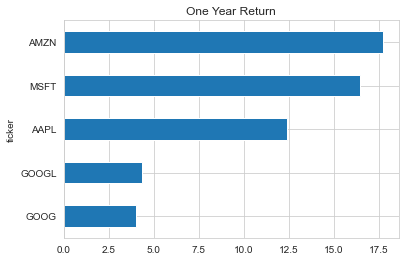

In [37]:
#2016 year return
last_day_price_2016 = ticker_wise.loc['2016-01-01':'2016-12-31'].xs(key='Adj. Close',axis = 1, level = 'Tvalues').iloc[-1]
first_day_price_2016 = ticker_wise.loc['2016-01-01':'2016-12-31'].xs(key='Adj. Close',axis = 1, level = 'Tvalues').iloc[0]
one_year_return_2016 = ((last_day_price_2016/first_day_price_2016)-1)*100
print(one_year_return_2016.sort_values(ascending=False).round(2))
one_year_return_2016.sort_values().plot(kind="barh",title="One Year Return")

<AxesSubplot:title={'center':'One Year Return'}, ylabel='ticker'>

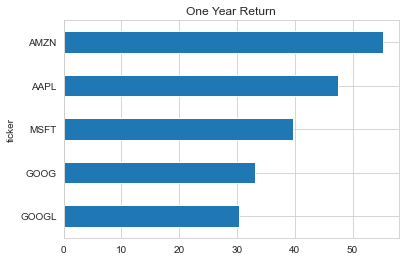

In [38]:
#2017 year return
last_day_price_2017 = ticker_wise.loc['2017-01-01':'2017-12-31'].xs(key='Adj. Close',axis = 1, level = 'Tvalues').iloc[-1]
first_day_price_2017 = ticker_wise.loc['2017-01-01':'2017-12-31'].xs(key='Adj. Close',axis = 1, level = 'Tvalues').iloc[0]
one_year_return_2017 = ((last_day_price_2017/first_day_price_2017)-1)*100
one_year_return_2017.sort_values(ascending=False).round(2)
one_year_return_2017.sort_values().plot(kind="barh",title="One Year Return")

Return for all the stocks in 2017 is much greater than 2016. In 2016 the stock market was down and started coming up in 2017

#### It is always better to do the statistical analysis on more number of data to get the accurate results. NASDAQdatalink has limited its data upto Mar-2018 (for most stocks) which it was taking from wikipedia. 

#### Hence, we continued gathering more data from Yahoo for the same stocks. More the data, better the prediction model. This helped us calculate risk and make better predictions at the end of the work

#### Okay, let's start with the statistical analysis

In [39]:

# Compare with similar company
similar_company = ['AAPL','MSFT','AMZN','GOOG','GOOGL'] #top 5 stocks
     
# Define the date range
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2021, 12, 31)

df = web.DataReader(similar_company, 'yahoo', start, end)  # create data
df.tail()

Attributes   Adj Close                                                  \
Symbols           AAPL        MSFT        AMZN        GOOG       GOOGL   
Date                                                                     
2021-12-27  179.289444  339.270966  169.669495  148.063995  147.906494   
2021-12-28  178.255447  338.082123  170.660995  146.447998  146.686996   
2021-12-29  178.344925  338.775635  169.201004  146.504501  146.654999   
2021-12-30  177.171722  336.170013  168.644501  146.002502  146.200500   
2021-12-31  176.545364  333.197906  166.716995  144.679504  144.852005   

Attributes       Close                                                  ...  \
Symbols           AAPL        MSFT        AMZN        GOOG       GOOGL  ...   
Date                                                                    ...   
2021-12-27  180.330002  342.450012  169.669495  148.063995  147.906494  ...   
2021-12-28  179.289993  341.250000  170.660995  146.447998  146.686996  ...   
2021-12-29  179.380005  341.950012  169.201004  146.504501  146.654999  ...   
2021-12-30  178.199997  339.320007  168.644501  146.002502  146.200500  ...   
2021-12-31  177.570007  336.320007  166.716995  144.679504  144.852005  ...   

Attributes        Open                                                  \
Symbols           AAPL        MSFT        AMZN        GOOG       GOOGL   
Date                                                                     
2021-12-27  177.089996  335.459991  171.037003  147.463501  147.255997   
2021-12-28  180.160004  343.149994  170.182495  148.374496  148.235992   
2021-12-29  179.330002  341.299988  170.839996  146.429504  146.644501   
2021-12-30  179.470001  341.910004  169.699997  146.449997  146.694000   
2021-12-31  178.089996  338.510010  168.955994  145.544006  146.050003   

Attributes      Volume                                                  
Symbols           AAPL        MSFT        AMZN        GOOG       GOOGL  
Date                                                                    
2021-12-27  74919600.0  19947000.0  58688000.0  13256000.0  15976000.0  
2021-12-28  79144300.0  15661500.0  54638000.0  18624000.0  18200000.0  
2021-12-29  62348900.0  15042000.0  35754000.0  17022000.0  17788000.0  
2021-12-30  59773000.0  15994500.0  37584000.0  12978000.0  15688000.0  
2021-12-31  64062300.0  18000800.0  47830000.0  17298000.0  18136000.0  

[5 rows x 30 columns]

In [40]:
AAPL = web.DataReader('AAPL', 'yahoo', start, end)
MSFT = web.DataReader('MSFT', 'yahoo', start, end)
AMZN = web.DataReader('AMZN', 'yahoo', start, end)
GOOG = web.DataReader('GOOG', 'yahoo', start, end)
GOOGL= web.DataReader('GOOGL', 'yahoo', start, end)

In [41]:
AAPL # check AAPL data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.111500
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.507284
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.047253
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.074551
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.191275
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.289444
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.255447
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.344925


## Data mining for stocks data

#### Moving averages

The 100-day moving averages constitute potent market trading indications. A prominent indicator that a stock has started an uptrend is typically the crossing of its 50-day moving average above its 100-day moving average.

In [42]:
# Calculating the rolling mean for observation
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

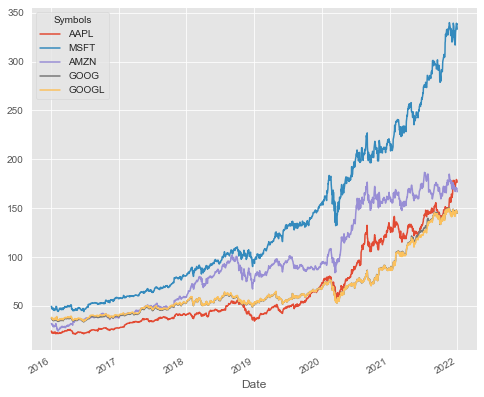

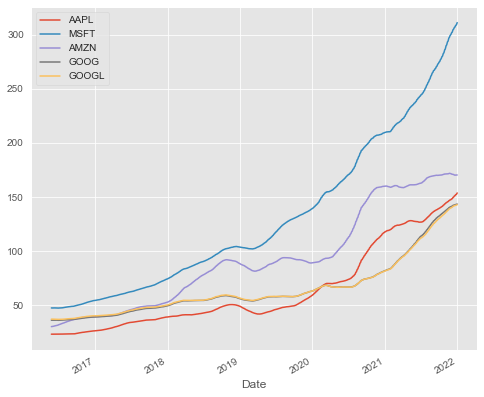

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In the graph above, MSFT has a higher mean than the other 4 companies.

<AxesSubplot:xlabel='Date'>

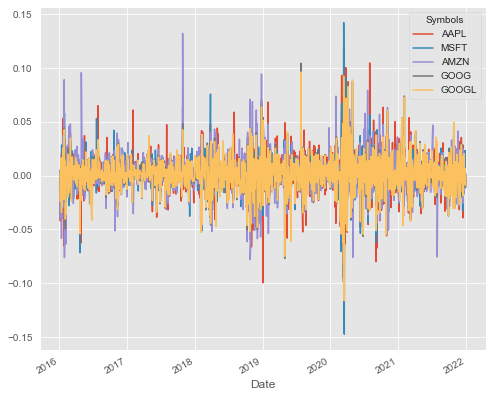

In [44]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

We can observe that from 2016 till 2019, AMZN's returns were at their highest. 
MSFT has the highest return after 2019.

The top 5 stocks' Adj Close value will now be seen.

In [45]:
df2 = web.DataReader([similar_company[0], similar_company[1],similar_company[2],similar_company[3],similar_company[4]],'yahoo',start=start,end=end)['Adj Close']
df2.tail()
     

Symbols,AAPL,MSFT,AMZN,GOOG,GOOGL
Date,,,,,
2021-12-27,179.289444,339.270966,169.669495,148.063995,147.906494
2021-12-28,178.255432,338.082123,170.660995,146.447998,146.686996
2021-12-29,178.344925,338.775635,169.201004,146.504501,146.654999
2021-12-30,177.171738,336.170013,168.644501,146.002502,146.200500
2021-12-31,176.545380,333.197906,166.716995,144.679504,144.852005


Now we will see the correlation of stocks.The pct_change() method returns a DataFrame with the percentage difference between the values for each row and, by default, the previous row.

In [46]:
#using pct_change() method returns a DataFrame with the percentage 
retscomp = df2.pct_change()
#checking Correlation
corr = retscomp.corr()
corr

Symbols,AAPL,MSFT,AMZN,GOOG,GOOGL
Symbols,,,,,
AAPL,1.000000,0.710001,0.595836,0.640434,0.640586
MSFT,0.710001,1.000000,0.673210,0.769210,0.773338
AMZN,0.595836,0.673210,1.000000,0.654711,0.651561
GOOG,0.640434,0.769210,0.654711,1.000000,0.992503
GOOGL,0.640586,0.773338,0.651561,0.992503,1.000000


Next we will compare each and every stock with one another. This is very important to chose best stock to invest as we can compare the year on year return percentage to compare the best stocks out of the lot. 

### Compare AAPL Vs MSFT


Text(0, 0.5, 'Returns_MSFT')

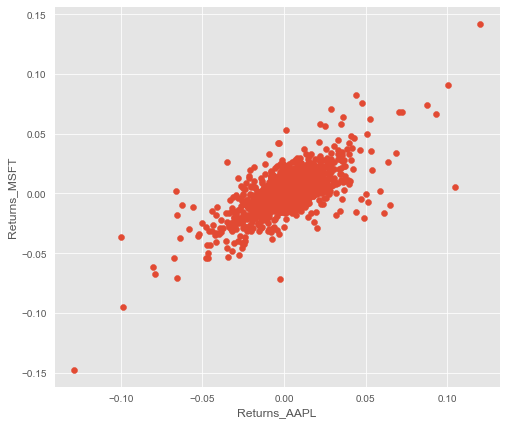

In [47]:
plt.scatter(retscomp[similar_company[0]], retscomp[similar_company[1]])
plt.xlabel('Returns_'+similar_company[0])
plt.ylabel('Returns_'+similar_company[1])

### Compare MSFT Vs AMZV

Text(0, 0.5, 'Returns_AMZN')

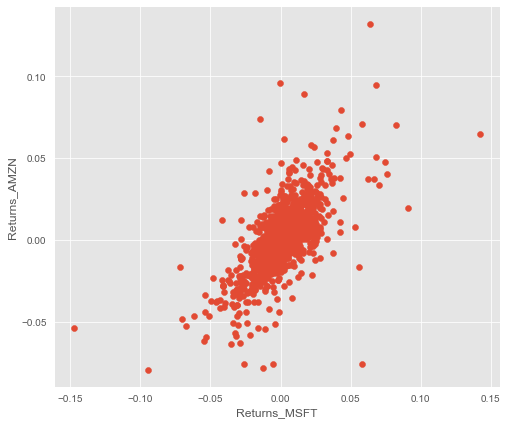

In [48]:
plt.scatter(retscomp[similar_company[1]], retscomp[similar_company[2]])
plt.xlabel('Returns_'+similar_company[1])
plt.ylabel('Returns_'+similar_company[2])

### Compare AMZV Vs GOOG

Text(0, 0.5, 'Returns_GOOG')

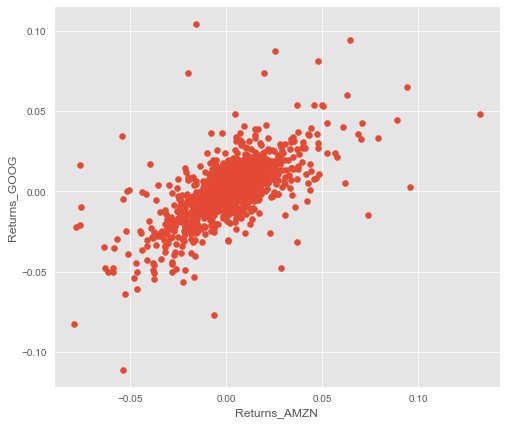

In [49]:
plt.scatter(retscomp[similar_company[2]], retscomp[similar_company[3]])
plt.xlabel('Returns_'+similar_company[2])
plt.ylabel('Returns_'+similar_company[3])

### Compare GOOG Vs GOOGL

Text(0, 0.5, 'Returns_GOOGL')

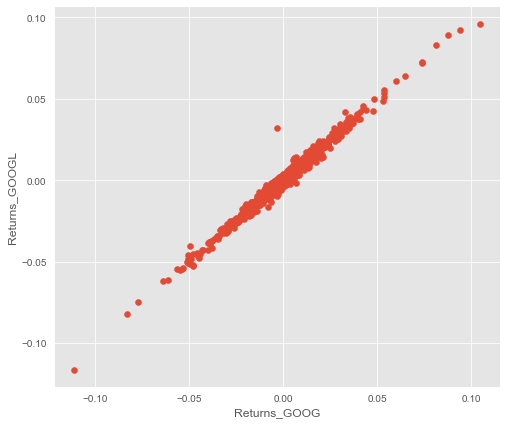

In [50]:
plt.scatter(retscomp[similar_company[3]], retscomp[similar_company[4]])
plt.xlabel('Returns_'+similar_company[3])
plt.ylabel('Returns_'+similar_company[4])

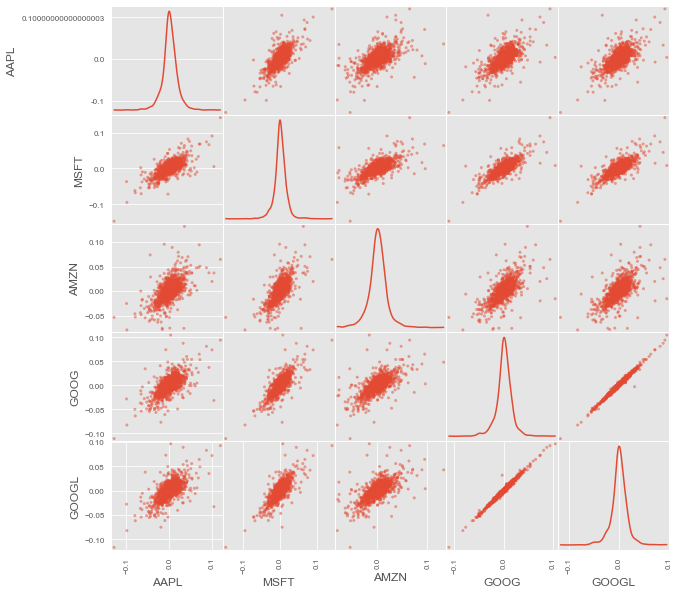

In [51]:
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

All of the numerical variables in a dataset are compactly plotted against one another using a scatter matrix (pairs plot). The evolution of the link between the variables is predicted with the use of a correlation matrix. You can get a broad overview of the more or less significant association between various variables using the correlation matrix.

/var/folders/c5/0_ry9lhx0tqg3rsbqsysn5cr0000gn/T/ipykernel_84981/85652110.py:3: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



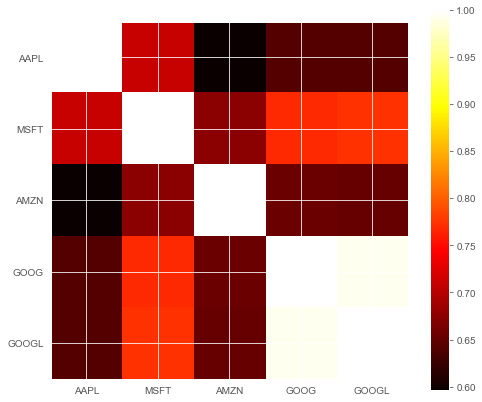

In [52]:
# Display Heatmap to identify the corelation between similar companies
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

## Risk Analysis of top 5 Stocks

Now we will calculate how much risk is involved in getting certain expected returns


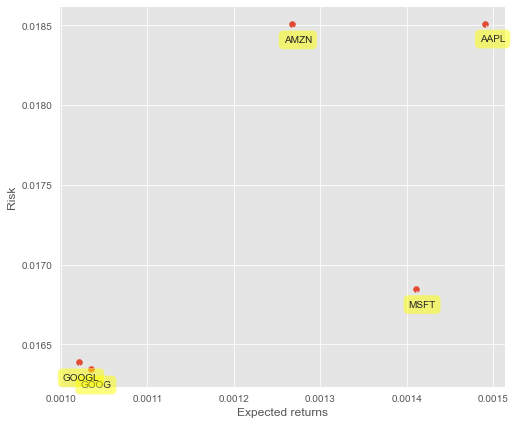

In [53]:
# Identify the risk on stock 
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

We can see that GOOGL and GOOG has less risk and minimum returns so we can assume that, higher the risk higher the expected returns.

# Relative Strength Index

We must first comprehend the RSI indicator in order to build an RSI-using application. The abbreviation RSI stands for Relative Strength Index. It is a momentum indicator that determines if an investment is overbought or oversold based on the size of price changes. The security is seen as being overbought if the RSI value is over 70, and oversold if it is below 30. Overbought indicates that the price will decline because the buying-induced bubble may soon burst. This makes for a powerful entry point. To be extra cautious, it is best practice to only place a selling order when the RSI value crosses the overbought line. Trying to predict when the RSI will peak


In [54]:
import talib

Implementing the point where the RSI line and the oversold and overbought lines connect requires the usage of the __talib__ (technical analysis) library. The implementation of how trades can be made using the oversold and overbought regions constitutes the majority of the software rather than programming the indicator, which has already been constructed and is available in the library.


##### calculates the rsi values, based on these two equations:

RSIstep1​=100−[100/(1+Average loss/Average gain​)]

RSIstep2​=100−[100/(1+Average average loss∗13+Current loss/Previous average gain∗13+Current gain​)​]

## AAPL RSI


In [55]:
rsi1 = talib.RSI(AAPL["Close"]) #calculate RSI


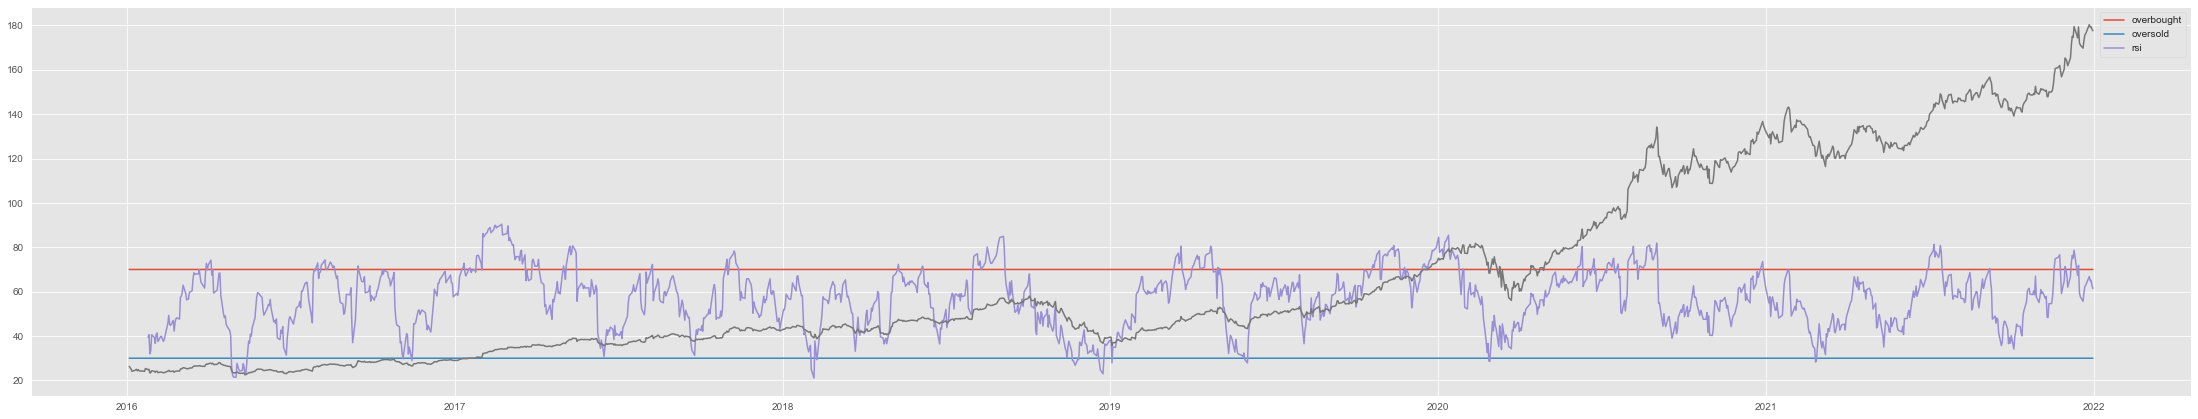

In [56]:
#Plotting the RSI in graph
fig = plt.figure()
fig.set_size_inches((30, 27))
ax_rsi = fig.add_axes((0, 0.24, 1,0.2))
ax_rsi.plot(AAPL.index, [70] * len(AAPL.index), label="overbought")
ax_rsi.plot(AAPL.index, [30] * len(AAPL.index), label="oversold")
ax_rsi.plot(AAPL.index, rsi1, label="rsi")
ax_rsi.plot(AAPL["Close"])
ax_rsi.legend()

This graph demonstrates all of the overbought and oversold areas as well as the RSI values derived for each value of the stock's recorded closing price. The stock data is well-visualized in this way. The resulting graph is shown here. As time passes, we can see the RSI value shifting among the various sections. The fact that RSI is relative is a plus. This indicates that the signal's strength is dependent on the relationship between previous values rather than the signal's actual value.

##### Same we will show for MFST and AMZN and GOOG

## MSFT RSI

In [57]:
rsi2 = talib.RSI(MSFT["Close"]) #calculate RSI

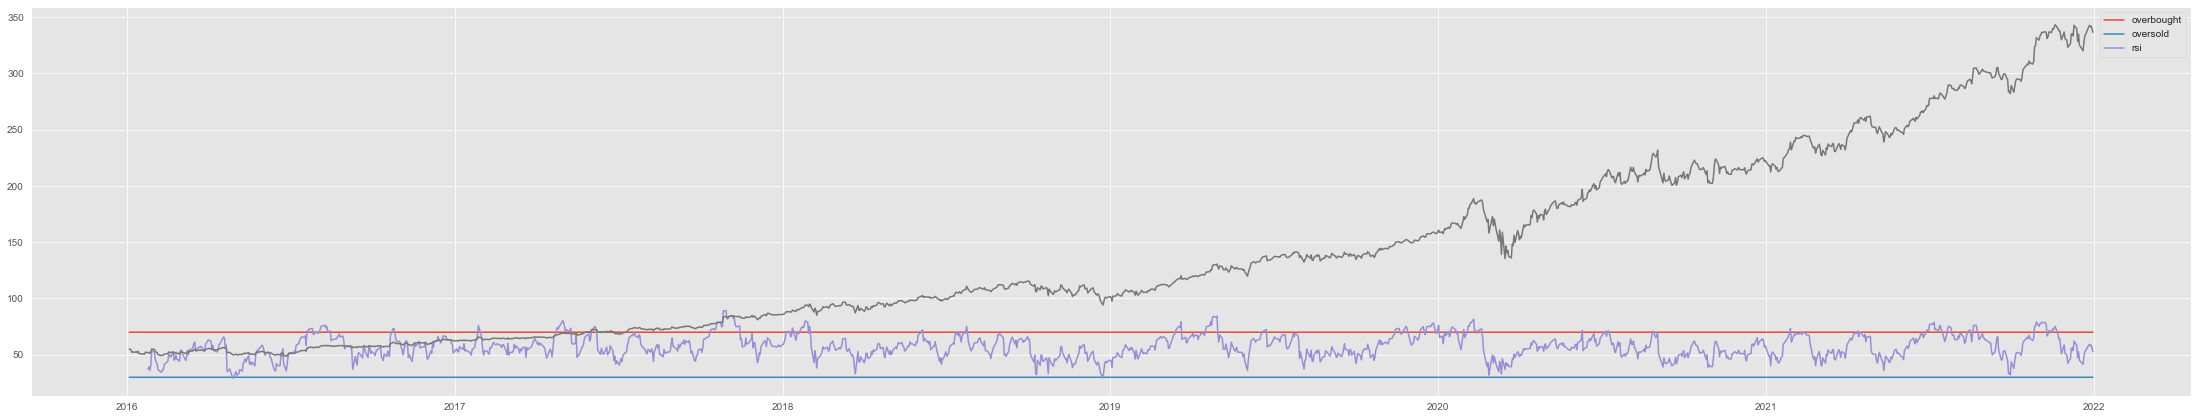

In [58]:
#Plotting the RSI in graph
fig = plt.figure()
fig.set_size_inches((30, 27))
ax_rsi = fig.add_axes((0, 0.24, 1,0.2))
ax_rsi.plot(MSFT.index, [70] * len(MSFT.index), label="overbought")
ax_rsi.plot(MSFT.index, [30] * len(MSFT.index), label="oversold")
ax_rsi.plot(MSFT.index, rsi2, label="rsi")
ax_rsi.plot(MSFT["Close"])
ax_rsi.legend()

## AMZN RSI

In [59]:
rsi3 = talib.RSI(AMZN["Close"])

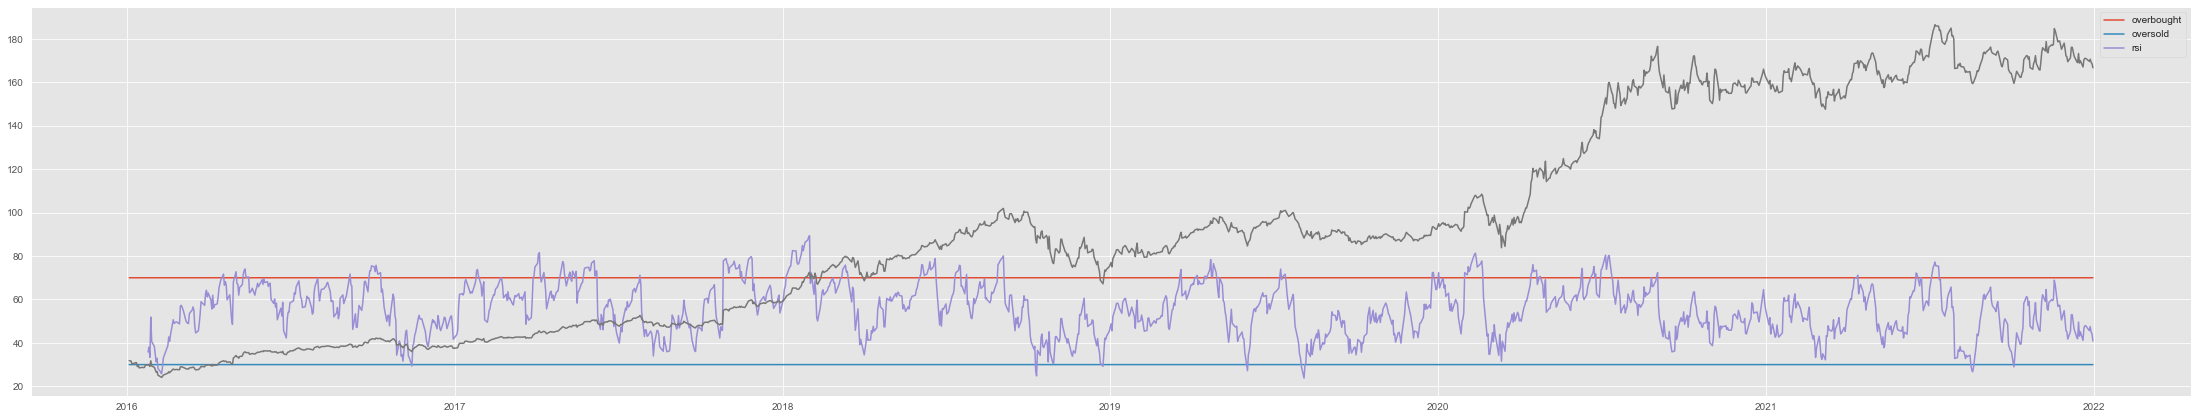

In [60]:
fig = plt.figure()
fig.set_size_inches((30, 27))
ax_rsi = fig.add_axes((0, 0.24, 1,0.2))
ax_rsi.plot(AMZN.index, [70] * len(AMZN.index), label="overbought")
ax_rsi.plot(AMZN.index, [30] * len(AMZN.index), label="oversold")
ax_rsi.plot(AMZN.index, rsi3, label="rsi")
ax_rsi.plot(AMZN["Close"])
ax_rsi.legend()

## GOOG RSI

In [61]:
rsi4 = talib.RSI(GOOG["Close"])

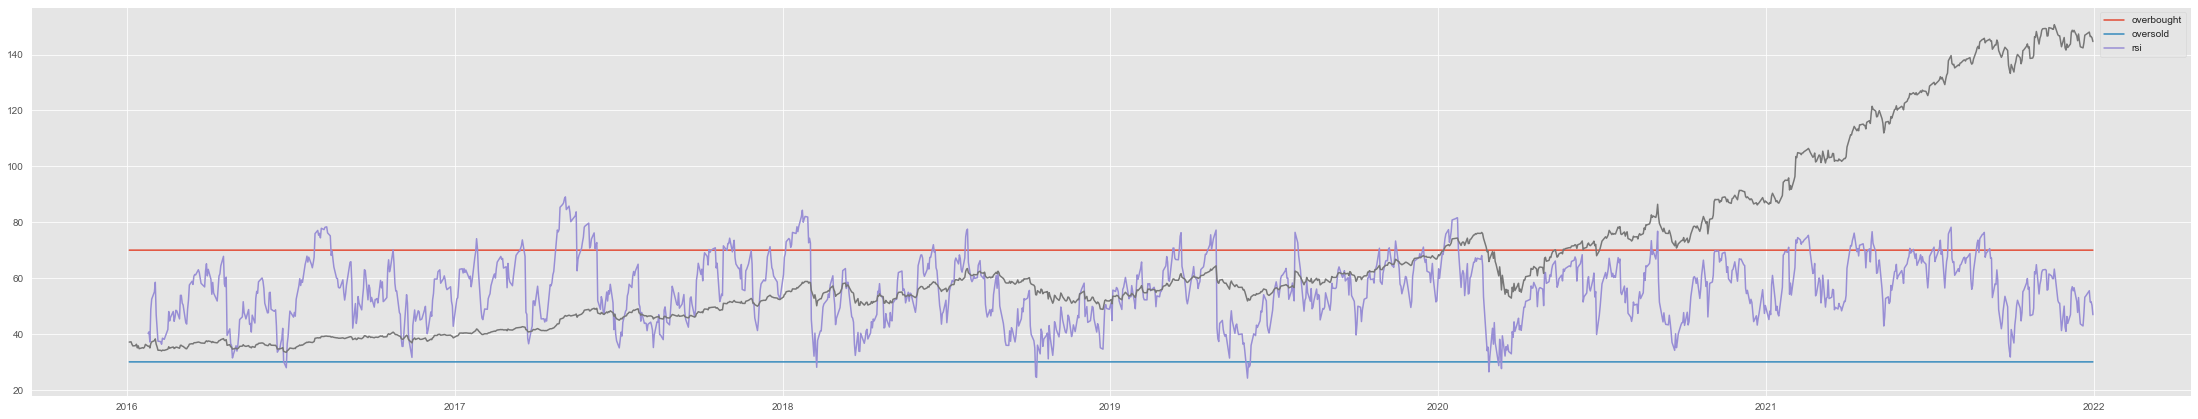

In [62]:
fig = plt.figure()
fig.set_size_inches((30, 27))
ax_rsi = fig.add_axes((0, 0.24, 1,0.2))
ax_rsi.plot(GOOG.index, [70] * len(GOOG.index), label="overbought")
ax_rsi.plot(GOOG.index, [30] * len(GOOG.index), label="oversold")
ax_rsi.plot(GOOG.index, rsi4, label="rsi")
ax_rsi.plot(GOOG["Close"])
ax_rsi.legend()

It is necessary to go further and truly evaluate the stock trading program, based on the profitability of the program. 

The code below keeps track of the categories that each point belongs to. It is either between the two lines, or in the overbought, oversold, or None zone.


In [63]:
len(rsi2) # MSFT RSI

1511

In [64]:
section = None
sections = []
for i in range(len(rsi2)): 
    if rsi2[i] < 30:
        section = 'oversold'
    elif rsi2[i] > 70:
        section = 'overbought'
    else:
        section = None
    sections.append(section)
    
print(sections)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'oversold', 'oversold', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'overbought', 'overbought', 'overbought', 'overbought', 'overbought', None, None, 'overbought', None, None, 'overbought', 'overbought', 'overbought', 'overbought', '

The fundamental RSI trading method is integrated into this code. When the value moves out of the overbought and oversold areas, the right deal is made according to the trading strategy. For instance, a buy transaction is performed if the stock exits the oversold area. It is a sell trade if it exits the overbought area.

In [65]:
trades = []  #create empty list
for i in range(1,len(sections)):
    trade = True
    if sections[i-1] == 'oversold' and sections[i] == None: # check if section1-1 =='oversold' and sections[i] == None
        trade = True                                           #trade will be true else false
    if sections[i-1] == 'overbought' and sections[i] == None:
        trade = False
    trades.append(trade)       #store all the trade value into trades list
print(trades)   


[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, 

This below code uses the trades executed by the software to determine whether each trade resulted in a profit or loss. As it specifically focuses on the variable to be looked for, this provides the best evaluation of the program. The number of shares purchased is determined by the qty variable. The profit is estimated once the program has run:


In [66]:
#to determine whether each trade resulted in a profit or loss

acp = MSFT['Close'][len(MSFT['Close'])-len(trades):].values
profit = 0
qty =10
for i in range(len(acp)-1):
    true_trade = None
    if acp[i] < acp[i+1]:
        true_trade = True
    elif acp[i] > acp[i+1]:
        true_trade = False
    if trades[i] == true_trade:
        profit += abs(acp[i+1] - acp[i]) * qty
    elif trades[i] != true_trade:
        profit += -abs(acp[i+1] - acp[i]) * qty
profit,qty

(2558.8994216918945, 10)

We can forecast that a buyer of 10 shares of Microsoft would profit by $2558.89.

Now we calculate daily profit of stocks.

## Calculate Per Day Profit of AAPL

In [67]:
#calculating Profit
profit=AAPL['Adj Close'].shift(-1)-AAPL['Adj Close']
AAPL['Profit']=profit

#calculating wealth
AAPL['Wealth']=AAPL['Profit'].cumsum()

AAPL.head(5)

,High,Low,Open,Close,Volume,Adj Close,Profit,Wealth
Date,,,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.111500,-0.604216,-0.604216
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.507284,-0.460032,-1.064247
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.047253,-0.972702,-2.036949
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.074551,0.116724,-1.920225
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.191275,0.359327,-1.560898


## Calculate Per Day Profit of MSFT


In [68]:
#calculating Profit
profit1=MSFT['Adj Close'].shift(-1)-MSFT['Adj Close']
MSFT['Profit1']=profit

MSFT['Wealth']=MSFT['Profit1'].cumsum()

MSFT.head(5)

,High,Low,Open,Close,Volume,Adj Close,Profit1,Wealth
Date,,,,,,,,
2016-01-04,54.799999,53.389999,54.320000,54.799999,53778000.0,49.130688,-0.604216,-0.604216
2016-01-05,55.389999,54.540001,54.930000,55.049999,34079700.0,49.354824,-0.460032,-1.064247
2016-01-06,54.400002,53.639999,54.320000,54.049999,39518900.0,48.458282,-0.972702,-2.036949
2016-01-07,53.490002,52.070000,52.700001,52.169998,56564900.0,46.772781,0.116724,-1.920225
2016-01-08,53.279999,52.150002,52.369999,52.330002,48754000.0,46.916237,0.359327,-1.560898


## Data Processing For AAPL

#### Adding new features to the dataset

Due to the high correlation,We have to add some features to the dataset.

HL_PCT calculates for the high-low percentage for each day.

PCT_change calculatesfor the open-close percentage for each day.


In [69]:
#calculate HL_PCT and PCT_change for AAPL
dfreg1 = AAPL.loc[:,['Adj Close','Volume']]
dfreg1['HL_PCT'] = (AAPL['High'] - AAPL['Low']) / AAPL['Close'] * 100.0
dfreg1['PCT_change'] = (AAPL['Close'] - AAPL['Open']) / AAPL['Open'] * 100.0
dfreg1.tail()


,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-12-27,179.289444,74919600.0,1.857700,1.829581
2021-12-28,178.255447,79144300.0,1.561717,-0.482910
2021-12-29,178.344925,62348900.0,1.388118,0.027883
2021-12-30,177.171738,59773000.0,1.391701,-0.707642
2021-12-31,176.545380,64062300.0,1.109422,-0.291981


### Data Processing For MSFT

In [70]:
##calculate HL_PCT and PCT_change for MSFT
dfreg2 = MSFT.loc[:,['Adj Close','Volume']]
dfreg2['HL_PCT'] = (MSFT['High'] - MSFT['Low']) / MSFT['Close'] * 100.0
dfreg2['PCT_change'] = (MSFT['Close'] - MSFT['Open']) / MSFT['Open'] * 100.0
dfreg2.tail()


,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-12-27,339.270966,19947000.0,2.058700,2.083712
2021-12-28,338.082092,15661500.0,1.022708,-0.553692
2021-12-29,338.775635,15042000.0,1.351073,0.190455
2021-12-30,336.170044,15994500.0,1.270187,-0.757508
2021-12-31,333.197906,18000800.0,1.043643,-0.646954


### Data Processing For AMZN

In [71]:
#calculate HL_PCT and PCT_change for AMZN
dfreg3 = AMZN.loc[:,['Adj Close','Volume']]
dfreg3['HL_PCT'] = (AMZN['High'] - AMZN['Low']) / AMZN['Close'] * 100.0
dfreg3['PCT_change'] = (AMZN['Close'] - AMZN['Open']) / AMZN['Open'] * 100.0
dfreg3.tail()


,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-12-27,169.669495,58688000,2.196914,-0.799539
2021-12-28,170.660995,54638000,1.781600,0.281169
2021-12-29,169.201004,35754000,1.543437,-0.959373
2021-12-30,168.644501,37584000,1.401764,-0.621978
2021-12-31,166.716995,47830000,1.674397,-1.325196


### Data Processing For GOOG

In [72]:
#calculate HL_PCT and PCT_change for GOOG
dfreg4 = GOOG.loc[:,['Adj Close','Volume']]
dfreg4['HL_PCT'] = (GOOG['High'] - GOOG['Low']) / GOOG['Close'] * 100.0
dfreg4['PCT_change'] = (GOOG['Close'] - GOOG['Open']) / GOOG['Open'] * 100.0
dfreg4.tail()


,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-12-27,148.063995,13256000,0.794588,0.407216
2021-12-28,146.447998,18624000,1.665434,-1.298403
2021-12-29,146.504501,17022000,1.146207,0.051217
2021-12-30,146.002502,12978000,0.893136,-0.305561
2021-12-31,144.679504,17298000,1.166371,-0.593980


### Data Processing For GOOGL

In [73]:
#calculate HL_PCT and PCT_change for GOOGL
dfreg5 = GOOGL.loc[:,['Adj Close','Volume']]
dfreg5['HL_PCT'] = (GOOGL['High'] - GOOGL['Low']) / GOOGL['Close'] * 100.0
dfreg5['PCT_change'] = (GOOGL['Close'] - GOOGL['Open']) / GOOGL['Open'] * 100.0
dfreg5.tail()


,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2021-12-27,147.906494,15976000,0.794082,0.441746
2021-12-28,146.686996,18200000,1.530123,-1.044953
2021-12-29,146.654999,17788000,1.206574,0.007159
2021-12-30,146.200500,15688000,0.892949,-0.336414
2021-12-31,144.852005,18136000,1.274747,-0.820266


## Prediction using Linear Models 

Picking forecast data

Since we want to forecast the stock prices for days and months to come, we are going to shift the Adj. Close column to create room for the predictions of the days to come.

In [74]:
import math
from sklearn import preprocessing

# Drop missing value
dfreg1.fillna(value=-99999, inplace=True)

# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg1)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg1['label'] = dfreg1[forecast_col].shift(-forecast_out)
X = np.array(dfreg1.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg1['label'])
y = y[:-forecast_out]
y_lately = y[-forecast_out:]

forecast_out


/var/folders/c5/0_ry9lhx0tqg3rsbqsysn5cr0000gn/T/ipykernel_84981/3115465700.py:13: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/Users/sweetysaha/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning:

Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.



16

The output shows that we shifted the Adj. close 16 days up. to make room for 16 new predictions. the data shifted would be added to a new column called label and that would be our target values.


We have successfully scaled the data. Remember that we included a new column called Label to our dataset which contains forecasted out values. Also, we made room for 16 new predictions. So we are going to pick all rows in the dataset excluding the remaining 16 rows as our training data, and use the remaining 16 rows as the data to be predicted.

## Model building

### Prediction using Linear Regression for AAPL

In [75]:
#Import libraries
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, Ridge
from sklearn.preprocessing import PolynomialFeatures


Now we are going to try linear regression model

In [76]:
X_train = X
y_train = y

# 1. Linear regression 
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

In [77]:
X_test = X_lately
y_test = y_lately

confidence_reg = clfreg.score(X_test, y_test)


print("confidencereg : ",confidence_reg)


confidencereg :  -0.962957295022935


In [78]:
dfreg_lr = dfreg1.copy()


noOfDaysData = 100


In [79]:
forecast_set_linear_regression = clfreg.predict(X_lately) ## data to be predicted
dfreg_lr['Forecast_linear_regression'] =  np.nan # data to be trained
print(forecast_set_linear_regression)

[178.01300466 182.88269166 178.7055444  177.45227499 182.50636975
 174.86012192 174.12962632 173.11361074 176.41227857 179.15478826
 180.02912108 184.04161407 182.95214506 183.14398893 181.93527803
 181.32155554]


Adding the predicted data to the dataset

### Visualizing Adj Close and the Forecast data

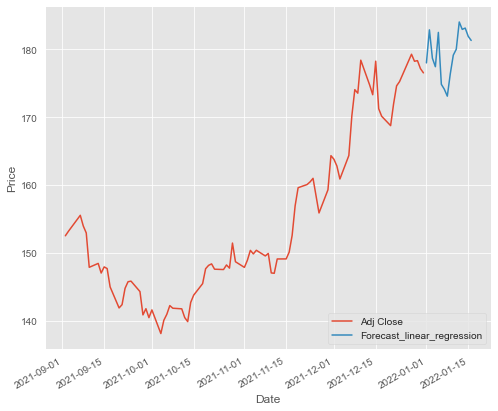

In [80]:
last_date = dfreg_lr.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_linear_regression:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg_lr.loc[next_date] = [np.nan for _ in range(len(dfreg_lr.columns)-1)]+[i]
    
#Visualizing Adj Close and the Forecast data¶    
dfreg_lr['Adj Close'].tail(noOfDaysData).plot()
dfreg_lr['Forecast_linear_regression'].tail(noOfDaysData).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


This graph shows red for actual data and in blue for predicted data, we can see that the prediction for this stock up and down for 15 days of Jan 2022

### Same we have done for AMZN

## Prediction using Linear Regression (AMZN)

In [81]:
dfreg_lr2 = dfreg3.copy() #AMZN

noOfDaysData = 100

In [82]:
forecast_set_linear_regression = clfreg.predict(X_lately)
dfreg_lr2['Forecast_linear_regression'] =  np.nan
print(forecast_set_linear_regression)


[178.01300466 182.88269166 178.7055444  177.45227499 182.50636975
 174.86012192 174.12962632 173.11361074 176.41227857 179.15478826
 180.02912108 184.04161407 182.95214506 183.14398893 181.93527803
 181.32155554]


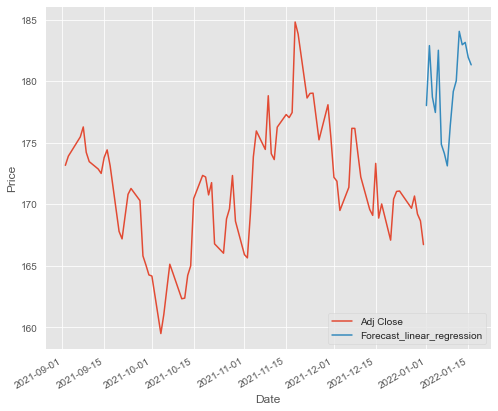

In [83]:
last_date = dfreg_lr2.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)
for i in forecast_set_linear_regression:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg_lr2.loc[next_date] = [np.nan for _ in range(len(dfreg_lr2.columns)-1)]+[i]
dfreg_lr2['Adj Close'].tail(noOfDaysData).plot()
dfreg_lr2['Forecast_linear_regression'].tail(noOfDaysData).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


Now you see the Stock price prediction model is ready 

## Daily Returns of stocks


We will calculate the monthly and daily price returns.

In [84]:
returns = web.DataReader(similar_company, 'yahoo', start, end) #built dataframe


In [85]:
 re= returns. drop(['Close','Open','Volume','High','Low'],axis=1) #drop all unnecessary columns
 re

Attributes   Adj Close                                                
Symbols           AAPL        MSFT        AMZN        GOOG       GOOGL
Date                                                                  
2016-01-04   24.111502   49.130692   31.849501   37.091999   37.972000
2016-01-05   23.507284   49.354836   31.689501   37.129002   38.076500
2016-01-06   23.047249   48.458286   31.632500   37.181000   37.966499
2016-01-07   22.074553   46.772781   30.396999   36.319500   37.049999
2016-01-08   22.191277   46.916225   30.352501   35.723499   36.545502
...                ...         ...         ...         ...         ...
2021-12-27  179.289444  339.270996  169.669495  148.063995  147.906494
2021-12-28  178.255432  338.082123  170.660995  146.447998  146.686996
2021-12-29  178.344925  338.775604  169.201004  146.504501  146.654999
2021-12-30  177.171738  336.170044  168.644501  146.002502  146.200500
2021-12-31  176.545364  333.197906  166.716995  144.679504  144.852005

[1511 rows x 5 columns]

Stock daily returns indicate the gain or loss per day for a given stock. We get it by subtracting the opening price from the closing price.

Conveniently, Pandas has the pct_change method to calculate the percentage of changes in the daily returns. Let’s use it and store it in a new column “daily_returns”.


In [86]:
#pct_change method to calculate the percentage of changes 

returns = re.pct_change()
returns = returns.dropna()
returns.head()

Attributes Adj Close                                        
Symbols         AAPL      MSFT      AMZN      GOOG     GOOGL
Date                                                        
2016-01-05 -0.025059  0.004562 -0.005024  0.000998  0.002752
2016-01-06 -0.019570 -0.018165 -0.001799  0.001400 -0.002889
2016-01-07 -0.042204 -0.034783 -0.039058 -0.023170 -0.024140
2016-01-08  0.005288  0.003067 -0.001464 -0.016410 -0.013617
2016-01-11  0.016192 -0.000573  0.017610  0.002183  0.002955

<AxesSubplot:title={'center':'Portfolio Returns'}>

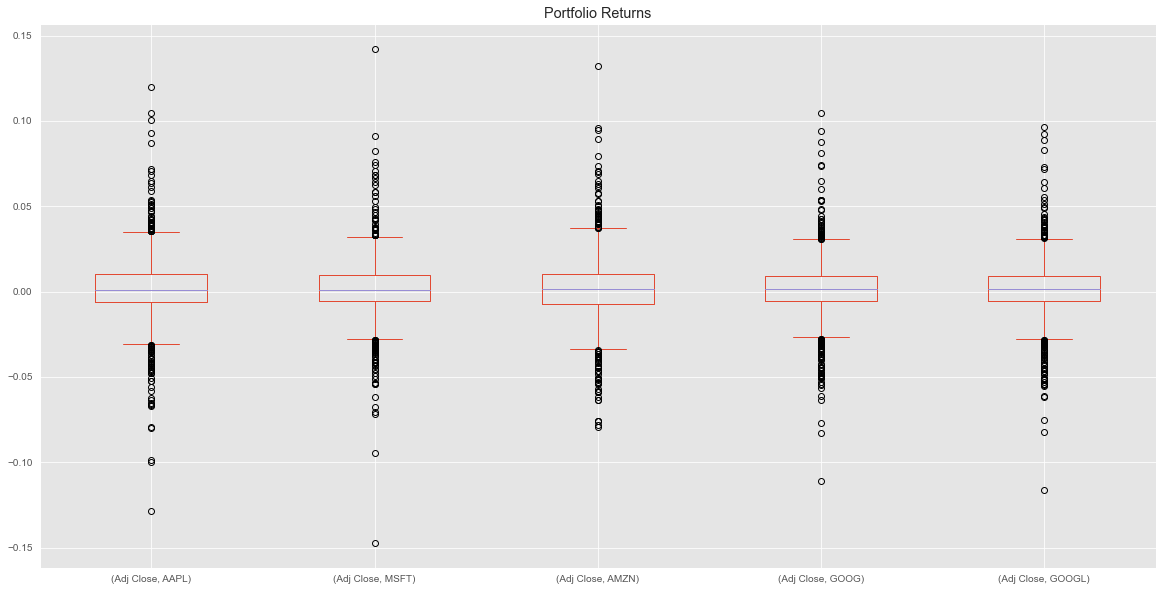

In [87]:
# Box plot to visually show returns:
returns.plot(kind = "box", figsize = (20,10), title="Portfolio Returns")


#### Average daily returns

In [88]:
meanDailyReturns = returns.mean() #calculate mean
print(meanDailyReturns)


Attributes  Symbols
Adj Close   AAPL       0.001491
            MSFT       0.001410
            AMZN       0.001267
            GOOG       0.001035
            GOOGL      0.001022
dtype: float64


#### Standard deviation of daily returns

In [89]:
stdDailyReturns = returns.std() #calculate STD
print(stdDailyReturns)


Attributes  Symbols
Adj Close   AAPL       0.018510
            MSFT       0.016847
            AMZN       0.018504
            GOOG       0.016344
            GOOGL      0.016389
dtype: float64


### CALCULATE MONTHLY RETURNS (AAPL)

In [90]:
#CALCULATE MONTHLY RETURNS for AAPL

monthly = AAPL.asfreq('BM')  #grouping the dataset by bymonthly
monthly['Returns'] = AAPL['Adj Close'].pct_change().dropna() # calculate returns

monthly['Month_Name'] = monthly.index.strftime("%b")    #group by month
monthly['Month_Name_Year'] = monthly.index.strftime("%b-%Y")#group by month and year

monthly = monthly.reset_index()     #reset the index
monthly['Month'] = monthly["Date"].dt.month


monthly #check the dataset AAPL

,Date,High,Low,Open,Close,Volume,Adj Close,Profit,Wealth,Returns,Month_Name,Month_Name_Year,Month
0,2016-01-29,24.334999,23.587500,23.697500,24.334999,257666000.0,22.278246,-0.208275,-2.041529,0.034541,Jan,Jan-2016,1
1,2016-02-29,24.557501,24.162500,24.215000,24.172501,140865200.0,22.249559,0.883631,-0.978310,-0.002270,Feb,Feb-2016,2
2,2016-03-31,27.475000,27.219999,27.430000,27.247499,103553600.0,25.079941,0.230112,1.198553,-0.005203,Mar,Mar-2016,3
3,2016-04-29,23.680000,23.127501,23.497499,23.434999,274126000.0,21.570734,-0.023018,-2.563784,-0.011494,Apr,Apr-2016,4
4,2016-05-31,25.100000,24.705000,24.900000,24.965000,169228800.0,23.118923,-0.324118,-1.316694,-0.004883,May,May-2016,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-08-31,152.800003,151.289993,152.660004,151.830002,86453100.0,150.733902,0.675079,127.297482,-0.008425,Aug,Aug-2021,8
68,2021-09-30,144.380005,141.279999,143.660004,141.500000,89056700.0,140.478470,1.141693,117.508663,-0.009312,Sep,Sep-2021,9
69,2021-10-29,149.940002,146.410004,147.220001,149.800003,124953200.0,148.718567,-0.833923,123.773144,-0.018156,Oct,Oct-2021,10
70,2021-11-30,165.520004,159.919998,159.990005,165.300003,174048100.0,164.346176,-0.526932,139.707745,0.031578,Nov,Nov-2021,11


#### We collected the data and calculated an average profit in case someone wanted to look up the stock's monthly returns and profits for a specific time period.


In [91]:
grouped= monthly.groupby(['Month_Name','Returns']) #GROUPING BY MONTH AND RETURNS


In [92]:
agg = grouped.agg({'Profit': ['mean']}) #calculate mean profit

agg.rename(columns={'mean': 'Average Profit'}, inplace = True) #rename the column


agg.tail(28) #check the data


Profit
                     Average Profit
Month_Name Returns                 
Mar        -0.005203       0.230112
           -0.002041      -3.284801
           -0.001876       0.009403
            0.006518       0.312592
            0.018766       0.841156
May        -0.018115      -0.430584
           -0.005922       0.099087
           -0.004883      -0.324118
           -0.003360       0.807503
           -0.000974       0.962494
Nov        -0.008434      -0.240980
           -0.005402       1.505669
           -0.002203      -0.756805
            0.013984      -0.190186
            0.021100       3.626457
            0.031578      -0.526932
Oct        -0.056018      -0.088783
           -0.018156      -0.833923
           -0.001583      -0.477171
            0.013916      -0.509281
            0.022610       1.723949
            0.026067       0.807934
Sep        -0.009312       1.141693
            0.003512       0.365490
            0.005480      -0.073429
            0.007755      -0.123363
            0.015076       0.966713
            0.023535       0.151390

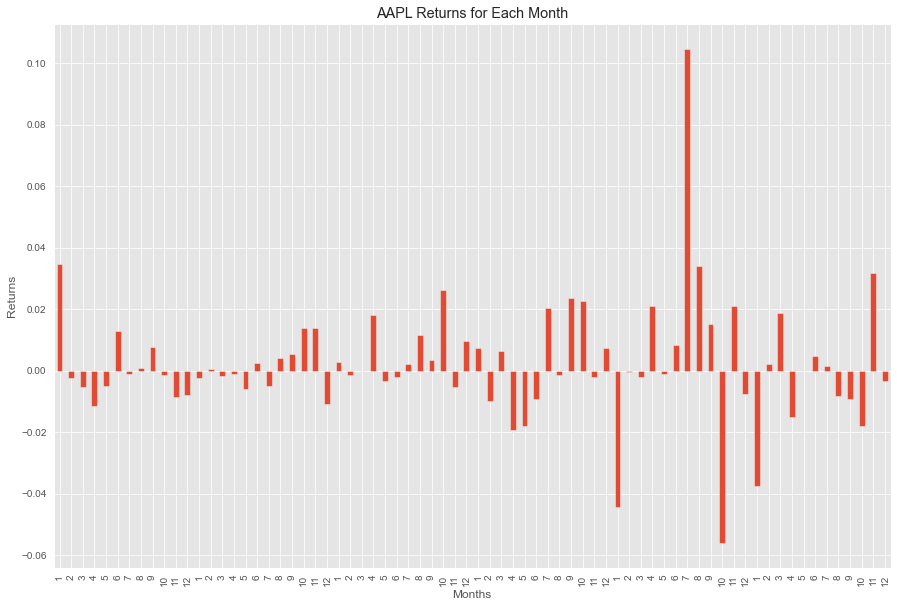

In [93]:
#visualizing monthly returns

monthly['Returns'].plot(kind='bar', figsize=(15,10))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title('AAPL' + " Returns for Each Month")
plt.xticks(monthly.index, monthly['Month'])
plt.show()


We can see that in the above graph the upward shows positive returns and the downward shows negative returns

#### We loaded Matplotlib to correctly visualize for clarity in visualization.

In [94]:
from matplotlib import dates as mdates

monthly['ReturnsPositive'] = 0 < monthly['Returns']
monthly['Date'] = pd.to_datetime(monthly['Date'])
monthly['Date'] = monthly['Date'].apply(mdates.date2num)



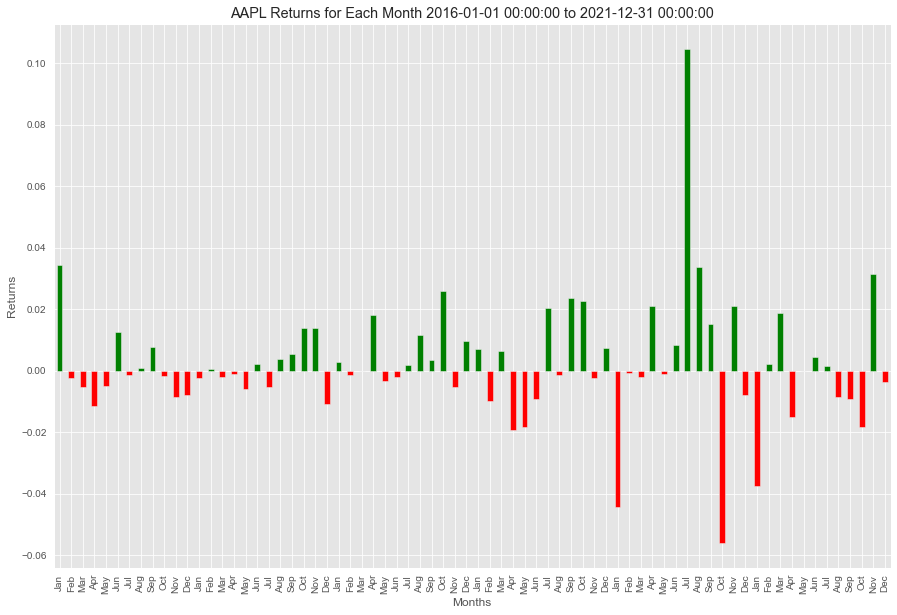

In [96]:
colors = monthly.ReturnsPositive.map({True: 'g', False: 'r'})
monthly['Returns'].plot(kind='bar', color = colors, figsize=(15,10))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title('AAPL' + " Returns for Each Month " + str(start) + ' to ' + str(end))
plt.xticks(monthly.index, monthly['Month_Name'])
plt.show()


The green in the graph above indicates positive returns, whereas the red indicates negative returns.

### Calculate Yearly Returns (AAPL)

In [97]:
#calculate yearly returns
yearly = AAPL.asfreq('BY')
yearly['Returns'] = AAPL['Adj Close'].pct_change().dropna()
yearly = yearly.reset_index()
yearly['Years'] = yearly['Date'].dt.year
print(yearly)


        Date        High         Low        Open       Close       Volume  \
0 2016-12-30   29.299999   28.857500   29.162500   28.955000  122345200.0   
1 2017-12-29   42.647499   42.305000   42.630001   42.307499  103999600.0   
2 2018-12-31   39.840000   39.119999   39.632500   39.435001  140014000.0   
3 2019-12-31   73.419998   72.379997   72.482498   73.412498  100805600.0   
4 2020-12-31  134.740005  131.720001  134.080002  132.690002   99116600.0   
5 2021-12-31  179.229996  177.259995  178.089996  177.570007   64062300.0   

    Adj Close    Profit      Wealth   Returns  Years  
0   27.097544  0.077209    3.063253 -0.007796   2016  
1   40.230183  0.720310   16.838993 -0.010814   2017  
2   38.061703  0.043434   13.993637  0.009665   2018  
3   71.920570  1.640968   49.450039  0.007306   2019  
4  131.116028 -3.241104  103.763424 -0.007703   2020  
5  176.545380       NaN         NaN -0.003535   2021  


In [98]:
yearly['ReturnsPositive'] = 0 < yearly['Returns']
yearly['Date'] = pd.to_datetime(yearly['Date'])
yearly['Date'] = yearly['Date'].apply(mdates.date2num)


<Figure size 576x504 with 0 Axes>

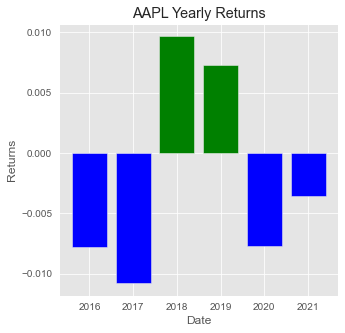

In [99]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'b'})
plt.gcf()
plt.gcf()
plt.figure(figsize=(5,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.title('AAPL' + ' Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()


We can see that in the above graph the green shows positive yearly returns and the blue shows negative yearly returns

##### Same we did for MSFT

### CALCULATE MONTHLY RETURNS (MSFT)

In [100]:
monthly1 = MSFT.asfreq('BM')
monthly1['Returns'] = MSFT['Adj Close'].pct_change().dropna()

monthly1['Month_Name'] = monthly1.index.strftime("%b")
monthly1['Month_Name_Year'] = monthly1.index.strftime("%b-%Y")

monthly1 = monthly1.reset_index()
monthly1['Month'] = monthly1["Date"].dt.month


monthly1


,Date,High,Low,Open,Close,Volume,Adj Close,Profit1,Wealth,Returns,Month_Name,Month_Name_Year,Month
0,2016-01-29,55.090000,54.000000,54.730000,55.090000,83611700.0,49.390694,-0.208275,-2.041529,0.058202,Jan,Jan-2016,1
1,2016-02-29,51.650002,50.660000,51.349998,50.880001,31654000.0,45.943752,0.883631,-0.978310,-0.008187,Feb,Feb-2016,2
2,2016-03-31,55.590000,54.860001,54.950001,55.230000,26360500.0,49.871735,0.230112,1.198553,0.003270,Mar,Mar-2016,3
3,2016-04-29,50.250000,49.349998,49.349998,49.869999,48411700.0,45.031742,-0.023018,-2.563784,-0.000601,Apr,Apr-2016,4
4,2016-05-31,53.000000,52.080002,52.259998,53.000000,37653100.0,48.192818,-0.324118,-1.316694,0.012997,May,May-2016,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-08-31,304.500000,301.500000,304.420013,301.880005,26285300.0,298.531403,0.675079,127.297482,-0.005633,Aug,Aug-2021,8
68,2021-09-30,287.829987,281.619995,285.709991,281.920013,32343600.0,278.792847,1.141693,117.508663,-0.007324,Sep,Sep-2021,9
69,2021-10-29,332.000000,323.899994,324.130005,331.619995,34766000.0,327.941528,-0.833923,123.773144,0.022414,Oct,Oct-2021,10
70,2021-11-30,337.779999,328.989990,335.320007,330.589996,42885600.0,327.521088,-0.526932,139.707745,-0.017943,Nov,Nov-2021,11


In [101]:
grouped= monthly1.groupby(['Month_Name','Returns'])


In [102]:
agg = grouped.agg({'Profit1': ['mean']})

agg.rename(columns={'mean': 'Average Profit'}, inplace = True)


agg.tail(28)

Profit1
                     Average Profit
Month_Name Returns                 
Mar        -0.015727      -3.284801
            0.002283       0.009403
            0.003270       0.230112
            0.008638       0.312592
            0.016907       0.841156
May        -0.016305      -0.430584
           -0.008095       0.099087
           -0.001112       0.807503
            0.010199       0.962494
            0.012997      -0.324118
Nov        -0.017943      -0.526932
           -0.013587      -0.240980
           -0.006171      -0.756805
           -0.005389       3.626457
            0.006353       1.505669
            0.009959      -0.190186
Oct        -0.010991      -0.088783
           -0.008575       1.723949
           -0.008463      -0.509281
            0.000835      -0.477171
            0.022414      -0.833923
            0.029692       0.807934
Sep        -0.007324       1.141693
           -0.000350       0.365490
            0.003484      -0.123363
            0.008393      -0.073429
            0.009439       0.151390
            0.014812       0.966713

In [103]:
from matplotlib import dates as mdates

monthly1['ReturnsPositive'] = 0 < monthly1['Returns']
monthly1['Date'] = pd.to_datetime(monthly1['Date'])
monthly1['Date'] = monthly1['Date'].apply(mdates.date2num)

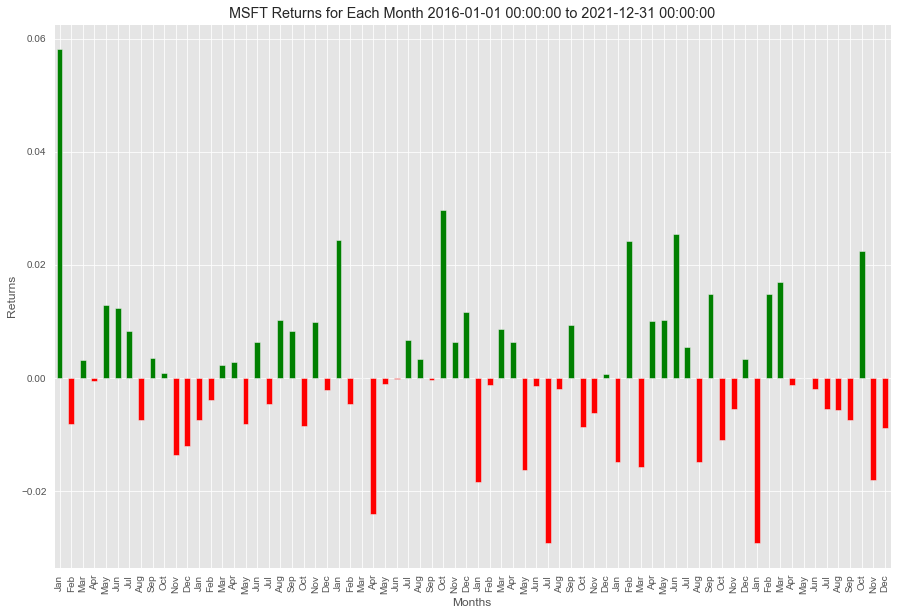

In [104]:
colors = monthly1.ReturnsPositive.map({True: 'g', False: 'r'})
monthly1['Returns'].plot(kind='bar', color = colors, figsize=(15,10))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title('MSFT' + " Returns for Each Month " + str(start) + ' to ' + str(end))
plt.xticks(monthly1.index, monthly['Month_Name'])
plt.show()

### Calculate Yearly Returns (MSFT)

In [105]:
yearly1 = MSFT.asfreq('BY')
yearly1['Returns'] = MSFT['Adj Close'].pct_change().dropna()
yearly1 = yearly1.reset_index()
yearly1['Years'] = yearly1['Date'].dt.year
print(yearly1)

        Date        High         Low        Open       Close      Volume  \
0 2016-12-30   62.990002   62.029999   62.959999   62.139999  25579900.0   
1 2017-12-29   86.050003   85.500000   85.629997   85.540001  18717400.0   
2 2018-12-31  102.400002  100.440002  101.290001  101.570000  33173800.0   
3 2019-12-31  157.770004  156.449997  156.770004  157.699997  18369400.0   
4 2020-12-31  223.000000  219.679993  221.699997  222.419998  20942100.0   
5 2021-12-31  339.359985  335.850006  338.510010  336.320007  18000800.0   

    Adj Close   Profit1      Wealth   Returns  Years  
0   57.240074  0.077209    3.063253 -0.012083   2016  
1   80.554306  0.720310   16.838993 -0.002100   2017  
2   97.305809  0.043434   13.993637  0.011754   2018  
3  153.313156  1.640968   49.450039  0.000698   2019  
4  218.523514 -3.241104  103.763424  0.003338   2020  
5  333.197906       NaN         NaN -0.008841   2021  


In [106]:
yearly1['ReturnsPositive'] = 0 < yearly1['Returns']
yearly1['Date'] = pd.to_datetime(yearly1['Date'])
yearly1['Date'] = yearly1['Date'].apply(mdates.date2num)


<Figure size 576x504 with 0 Axes>

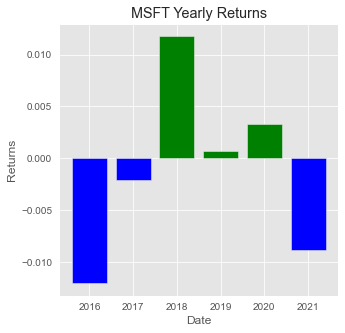

In [107]:
colors = yearly1.ReturnsPositive.map({True: 'g', False: 'b'})
plt.gcf()
plt.gcf()
plt.figure(figsize=(5,5))
plt.bar(yearly1['Years'], yearly1['Returns'], color=colors, align='center')
plt.title('MSFT' + ' Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

## Stock Alpha & Beta (AAPL)

Alpha is a measurement of performance. A positive alpha of 1.0 means the fund or stock has outperformed its benchmark index by 1 percent. A negative alpha of 1.0 would indicate an underperformance of 1 percent.

Beta is a measurement of volatile. A beta of less than 1 means that the security will be less volatile than the market.


In [108]:
stock=data.DataReader('AAPL','yahoo','2016/1/1','2021/12/31')  #STOCK
market=data.DataReader('^GSPC','yahoo','2016/1/1','2021/12/31') #benchmark returns

market.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034
2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961
2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010
2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966
2016-01-08,1960.400024,1918.459961,1945.969971,1922.030029,4664940000,1922.030029


we need to regress the portfolio returns against the benchmark returns. To do that we will use S&P 500 etf as our benchmark and calculate its returns.

will calculate the daily returns for our assets

In [109]:
prices = stock['Adj Close']
values = market['Adj Close']

ret = (np.log(prices) - np.log(prices.shift(1))).dropna()

In [110]:
ret.tail()

Date
2021-12-27    0.022715
2021-12-28   -0.005784
2021-12-29    0.000502
2021-12-30   -0.006600
2021-12-31   -0.003542
Name: Adj Close, dtype: float64

After this we will calculate the portfolio returns.

In [111]:
mrk = values.pct_change(1).dropna()

mrk.head()

Date
2016-01-05    0.002012
2016-01-06   -0.013115
2016-01-07   -0.023700
2016-01-08   -0.010838
2016-01-11    0.000853
Name: Adj Close, dtype: float64

In [112]:
from scipy import stats

beta, alpha, r_value, p_value, std_err = stats.linregress(ret, mrk)
print("Beta: %9.6f" % beta)
print("Alpha: %9.6f" % alpha)
print("R-Squared: %9.6f" % r_value)
print("p-value:%9.6f" % p_value)
print("Standard Error: %9.6f" % std_err)

Beta:  0.464678
Alpha:  0.000026
R-Squared:  0.744971
p-value: 0.000000
Standard Error:  0.010715


We can see that this portfolio had a 0.000026 alpha. The portfolio beta was 0.464678. This suggests that for every +1% move in the S&P 500 our portfolio will go up 0.93% in value.


We did same for MSFT

## Stock Alpha & Beta (MSFT)

In [113]:
stock=data.DataReader('MSFT','yahoo','2016/1/1','2021/12/31')
market=data.DataReader('^GSPC','yahoo','2016/1/1','2021/12/31')

stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,54.799999,53.389999,54.320000,54.799999,53778000.0,49.130692
2016-01-05,55.389999,54.540001,54.930000,55.049999,34079700.0,49.354832
2016-01-06,54.400002,53.639999,54.320000,54.049999,39518900.0,48.458286
2016-01-07,53.490002,52.070000,52.700001,52.169998,56564900.0,46.772770
2016-01-08,53.279999,52.150002,52.369999,52.330002,48754000.0,46.916237


In [114]:
prices = stock['Adj Close']
values = market['Adj Close']

ret = (np.log(prices) - np.log(prices.shift(1))).dropna()

ret.tail()

Date
2021-12-27    0.022921
2021-12-28   -0.003510
2021-12-29    0.002049
2021-12-30   -0.007721
2021-12-31   -0.008881
Name: Adj Close, dtype: float64

In [115]:
mrk = values.pct_change(1).dropna()

mrk.head()

Date
2016-01-05    0.002012
2016-01-06   -0.013115
2016-01-07   -0.023700
2016-01-08   -0.010838
2016-01-11    0.000853
Name: Adj Close, dtype: float64

In [116]:
beta, alpha, r_value, p_value, std_err = stats.linregress(ret, mrk)
print("Beta: %9.6f" % beta)
print("Alpha: %9.6f" % alpha)
print("R-Squared: %9.6f" % r_value)
print("p-value:%9.6f" % p_value)
print("Standard Error: %9.6f" % std_err)


Beta:  0.563851
Alpha: -0.000077
R-Squared:  0.822502
p-value: 0.000000
Standard Error:  0.010041


## Stock Predictive Model (Actual Vs Prediction)

We are designing a stock predictive model by training the model from 5 years stock data

In [114]:
#Load data
company ='AMZN'

start =dt.datetime(2016,1,1)
end = dt.datetime(2021,12,31)

data = web.DataReader(company, 'yahoo', start, end) #data source: yahoo api

In [115]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,172.942993,169.215500,171.037003,169.669495,58688000,169.669495
2021-12-28,172.175995,169.135498,170.182495,170.660995,54638000,170.660995
2021-12-29,171.212006,168.600494,170.839996,169.201004,35754000,169.201004
2021-12-30,170.888000,168.524002,169.699997,168.644501,37584000,168.644501
2021-12-31,169.350006,166.558502,168.955994,166.716995,47830000,166.716995


### Data Preparation for Predictive Model

For data preparation, we need to scale all available "Close" value. We will use the default configuration and scale values to the range 0 and 1. First, a MinMaxScaler instance is defined with default hyperparameters. MinMaxScaler is used to normalize the input variables. By doing so, all features will be transformed into the range 0,1. Once defined, we can call the fit_transform() function and pass it to our dataset to create a transformed version of our dataset.

In [116]:
#Scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

### Incorporating Timesteps Into Data

We need to input the data in the form of a 3D array to the LSTM model. First, we create data in 30 timesteps (30 days of stock closing value) before using numpy to convert it into an array. Finally, we convert the data into a np array with X_train samples, 30 timestamps, and one feature at each step.

In [117]:
prediction_days = 30 #timesteps

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train) # creating numpy array
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


### Building the Model

The LSTM layer is added with the following arguments: 
50 units is the dimensionality of the output space, return_sequences=True is necessary for stacking LSTM layers so the consequent LSTM layer has a three-dimensional sequence input, and input_shape is the shape of the training dataset.

Dropout layer is 0.2, that means that 20% of the layers will be dropped. Following the LSTM and Dropout layers, we add the Dense layer that specifies an output of one unit. To compile our model we use the Adam optimizer and set the loss as the mean_squared_error. After that, we fit the model to run for 50 epochs (the epochs are the number of times the learning algorithm will work through the entire training set) with a batch size of 32.

In [118]:
#Build the Model

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1)) #Prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)

2022-12-12 20:11:46.168976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
47/47 [==============================] - 4s 17ms/step - loss: 0.0314
Epoch 2/50
47/47 [==============================] - 1s 17ms/step - loss: 0.0015
Epoch 3/50
47/47 [==============================] - 1s 17ms/step - loss: 0.0014
Epoch 4/50
47/47 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 5/50
47/47 [==============================] - 1s 16ms/step - loss: 0.0012
Epoch 6/50
47/47 [==============================] - 1s 16ms/step - loss: 0.0014
Epoch 7/50
47/47 [==============================] - 1s 16ms/step - loss: 0.0014
Epoch 8/50
47/47 [==============================] - 1s 16ms/step - loss: 0.0012
Epoch 9/50
47/47 [==============================] - 1s 16ms/step - loss: 0.0014
Epoch 10/50
47/47 [==============================] - 1s 16ms/step - loss: 0.0012
Epoch 11/50
47/47 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 12/50
47/47 [==============================] - 1s 16ms/step - loss: 0.0012
Epoch 13/50
47/47 [==================

### Comparison with actual stock data

We are comparing data from LTSM model to existing actual stock data from yahoo API. We are doing this comparison to find how the model is performing comparing to the actual. The original data set date range was 1-1-2016 to 12-31-2021, now, we are testing the model for date range between Jan 1st, 2022 and Dec 7th, 2022. We will visualize the comparison by ploting a graph.

In [119]:
#Load Test data
test_start = dt.datetime(2022,1,1)
test_end = dt.datetime(2022,12,7)

nextday= test_end + datetime.timedelta(days=1)
prediction_date = nextday.strftime('%m/%d/%Y')

test_data = web.DataReader(company, 'yahoo', test_start, test_end) #data source: yahoo api
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0) #combining Training data & Test data

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1) # Reshape model inputs
model_inputs = scaler.transform(model_inputs) #scale it down



In [120]:
# Make Prediction on Test Data

x_test = []

for x in range(prediction_days, len(model_inputs)+1):
    x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test) # test array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # reshape array

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices) #reverse scaling to get actual prices



8/8 [==============================] - 1s 5ms/step


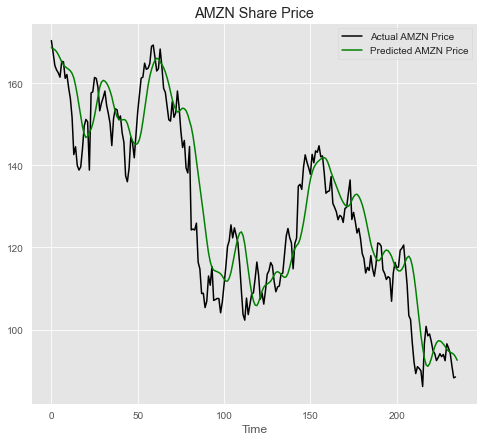

In [121]:
#plot the test prediction

plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.rcParams['figure.figsize'] = [10, 6]
#plt.ylable(f"{company} Share Price")
plt.legend()
plt.show()


In [122]:
# Predict next
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction for {prediction_date}: {prediction}")


1/1 [==============================] - 1s 622ms/step
Prediction for 12/08/2022: [[92.34428]]


### From our analysis we suggest below five stocks for our clients:

1.	Alphabet Inc. (NASDAQ: GOOG): Market Cap: 1.20T, Beta: 1.06, PE Ratio: 19.02, EPS: 4.92
2.	Amazon.com, Inc. (NASDAQ: AMZN): Market Cap: 923.76B, Beta: 1.19, PE Ratio: 82.32, EPS: 1.10
3.	Tesla, Inc. (NYSE: TSLA): Market Cap: 529.93B, Beta: 1.91, PE Ratio: 50.25, EPS: 3.34
4.	ServiceNow, Inc. (NYSE: NOW): Market Cap: 81.13B, Beta: 0.97, PE Ratio: 401.64, EPS: 1.00
5.	The Walt Disney Company (NYSE: DIS): Market Cap: 172.62B, Beta: 1.21, PE Ratio: 53.48, EPS: 1.77

## Conclusion

Stock market forecasting seeks to forecast future changes in a financial exchange's stock value. Investors will be able to earn more if share price movements can be predicted accurately. 

Our project will analyze and predict not only for one stock but for each and every stock.

User can calculate how much risk is involved in a particular stock in respect to it's gains so the user will be able to make the judgement.

The prediction model predicts the stock prices for investments.

User can analyze daily monthly and yearly returns.

Relative Strengh Index for stock can be identified from our analysis code for every stock.

Our project can calculate the Alpha and Beta of a stock's return on an investment that is marginally greater than a benchmark index, such as the S&P 500 or another suitable benchmark. When an investor opts for an active investment plan, which means they're attempting to outperform the market, alpha is employed as a measuring stick.

Our model predicted that, Prediction for 'AMZN' on 12/08/2022 would be '$92.35'. The-actual-closing-price-was '$90.35'. We can say our model is able to predict more than with 95% accuracy.


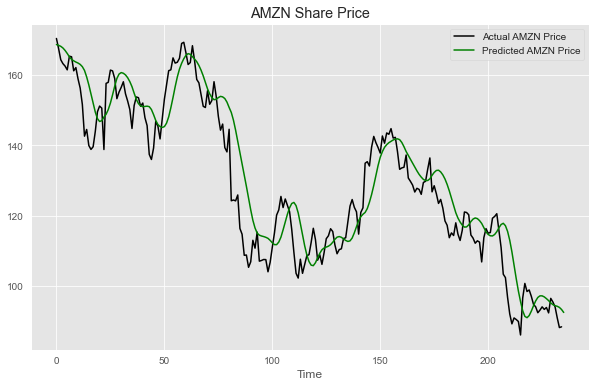

In [123]:
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.rcParams['figure.figsize'] = [10, 6]
#plt.ylable(f"{company} Share Price")
plt.legend()
plt.show()

## Reference:

https://www.worldresearchersassociations.com/mngmntspecialissue/6.pdf